In [1]:
import collections
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from venn import venn
import numpy as np
import math
import scipy

/var/folders/y8/66w8_8kj0dx2znq80cdbl_rw0000gn/T/ipykernel_9073/2185171821.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
clinical_df = pyreadr.read_r('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/figurecode/data/20221109_TRACERx421_all_patient_df.rds')
clinical_df = pd.DataFrame(clinical_df[None])
clinical_df.head()

,cruk_id,tumour_id_muttable_cruk,tumour_id_per_patient,age,sex,ethnicity,cigs_perday,years_smoking,packyears,smoking_status_merged,...,os_time,cens_dfs,dfs_time,cens_dfs_any_event,dfs_time_any_event,cens_lung_event,lung_event_time,Relapse_cat,Relapse_cat_new,tx100
0,CRUK0034,CRUK0034,CRUK0034,68,Female,White- Irish,20.0,35,35.000,Ex-Smoker,...,1849,0,1849,0,1849,0,1849,NaN,No rec,True
1,CRUK0150,CRUK0150,CRUK0150,81,Male,White- British,44.5,49,109.025,Ex-Smoker,...,1362,1,1362,1,1362,0,1362,NaN,No rec,False
2,CRUK0159,CRUK0159,CRUK0159,60,Male,White- British,20.0,38,38.000,Smoker,...,2224,1,2224,1,1935,0,2224,Second primary lung,No rec,False
3,CRUK0090,CRUK0090,CRUK0090,65,Male,White- British,10.0,35,17.500,Ex-Smoker,...,2365,1,1143,1,1143,1,1143,Intrathoracic,Intrathoracic,True
4,CRUK0045,CRUK0045,CRUK0045,85,Male,White- British,10.0,25,12.500,Ex-Smoker,...,986,1,917,1,917,1,917,Intrathoracic,Intrathoracic,True


In [3]:
tumor_df = pyreadr.read_r('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/LCCE_converted_data/20221109_TRACERx421_all_tumour_df.rds')
tumor_df = pd.DataFrame(tumor_df[None])
tumor_df.head()

,tumour_id,patient_id,clinical_sex,age,ethnicity,Histology_per_tumour_id_muttable,histology_3,LUAD_pred_subtype_with.IMA_per_tumour,site_per_lesion,pT_stage_per_lesion,pN_stage_per_lesion,size_pathology_per_lesion,vascular_invasion_per_lesion,pleural_invasion_per_lesion,smoking_status_merged,cigs_perday,years_smoking,pack_years,is.family.lung,pathologyTNM
0,CRUK0034,CRUK0034,Female,68,White- Irish,Invasive adenocarcinoma,LUAD,acinar,Right Upper Lobe,2a,0,40,Yes,No,Ex-Smoker,20.0,35,35.000,True,IB
1,CRUK0150,CRUK0150,Male,81,White- British,LCNEC,Other,NaN,Left Upper Lobe,3,0,75,Yes,No,Ex-Smoker,44.5,49,109.025,False,IIB
2,CRUK0159,CRUK0159,Male,60,White- British,Invasive adenocarcinoma,LUAD,acinar,Right Upper Lobe,2a,0,36,Yes,Yes,Smoker,20.0,38,38.000,False,IB
3,CRUK0090,CRUK0090,Male,65,White- British,Squamous cell carcinoma,LUSC,NaN,Right Upper Lobe,2a,1,35,Yes,Yes,Ex-Smoker,10.0,35,17.500,False,IIA
4,CRUK0045,CRUK0045,Male,85,White- British,Invasive adenocarcinoma,LUAD,papillary,Left Lower Lobe,2a,0,48,Yes,Yes,Ex-Smoker,10.0,25,12.500,False,IB


In [4]:
mut_table = pyreadr.read_r('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/LCCE_converted_data/20221109_TRACERx421_mutation_table.rds')
mut_table = pd.DataFrame(mut_table[None])
mut_table.head()

,patient_id,tumour_id,mutation_id,chr,start,stop,ref,var,Hugo_Symbol,func,...,AAChange,GL_VAF,GL_nAlt,GL_depth,ITHState,PyCloneClonal_SC,PyCloneCluster_SC,cleanCluster_SC,combTiming_SC,DriverMut
0,CRUK0005,CRUK0005,CRUK0005:19:34291428:G,chr19,34291428,34291428,G,T,KCTD15,intronic,...,NaN,0,0,187,1,S,3.0,True,subclonal,False
1,CRUK0005,CRUK0005,CRUK0005:19:9084770:C,chr19,9084770,9084770,C,A,MUC16,exonic,...,p.V2349L,0.39,2,510,1,C,2.0,True,early,False
2,CRUK0005,CRUK0005,CRUK0005:1:2160418:G,chr1,2160418,2160418,G,T,SKI,exonic,...,p.P71P,0,0,114,1,C,2.0,True,early,False
3,CRUK0005,CRUK0005,CRUK0005:19:40095981:G,chr19,40095981,40095981,G,T,LGALS13,exonic,...,p.G86C,0,0,659,1,C,2.0,True,early,False
4,CRUK0005,CRUK0005,CRUK0005:19:41313703:C,chr19,41313703,41313703,C,G,RAB4B-EGLN2,ncRNA_intronic,...,NaN,0,0,894,3,S,5.0,True,subclonal,False


In [5]:
clinical_df = clinical_df.sort_values(by=['cruk_id'])
clinical_df

,cruk_id,tumour_id_muttable_cruk,tumour_id_per_patient,age,sex,ethnicity,cigs_perday,years_smoking,packyears,smoking_status_merged,...,os_time,cens_dfs,dfs_time,cens_dfs_any_event,dfs_time_any_event,cens_lung_event,lung_event_time,Relapse_cat,Relapse_cat_new,tx100
88,CRUK0001,CRUK0001,CRUK0001,84,Male,White- British,20.0,30,30.00,Ex-Smoker,...,1120,1,1120,1,1120,0,1120,NaN,No rec,True
79,CRUK0002,CRUK0002,CRUK0002,81,Male,White- British,5.0,35,8.75,Ex-Smoker,...,1901,0,1901,0,1901,0,1901,NaN,No rec,True
26,CRUK0003,CRUK0003,CRUK0003,78,Female,White- British,0.0,0,0.00,Never Smoked,...,2304,1,217,1,217,1,217,Intra & Extra,Intra & Extra,True
23,CRUK0004,CRUK0004,CRUK0004,69,Female,White- British,10.0,27,13.50,Ex-Smoker,...,1323,1,325,1,325,1,325,Intra & Extra,Intra & Extra,True
7,CRUK0005,CRUK0005,CRUK0005,74,Female,White- British,20.0,56,56.00,Ex-Smoker,...,649,1,649,1,649,0,649,NaN,No rec,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,CRUK0861,CRUK0861,CRUK0861,65,Female,Middle eastern,10.0,45,22.50,Smoker,...,1084,0,1084,0,1084,0,1084,NaN,No rec,False
418,CRUK0864,CRUK0864,CRUK0864,78,Female,White- British,10.0,30,15.00,Ex-Smoker,...,1434,0,1434,0,1434,0,1434,NaN,No rec,False
416,CRUK0872,CRUK0872,CRUK0872,66,Male,White- British,20.0,54,54.00,Ex-Smoker,...,893,1,883,1,883,1,883,Intra & Extra,Intra & Extra,False
420,CRUK0881,CRUK0881_Tumour1,CRUK0881_Tumour1;CRUK0881_Tumour2,84,Male,White- British,20.0,70,70.00,Smoker,...,758,1,748,1,748,1,748,Intrathoracic,Intrathoracic,False


In [36]:
gene_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/100_gene_matrix.csv')
driver_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/100_driver_matrix.csv')

In [37]:
gene_matrix = gene_matrix.set_index('patient_id')
driver_matrix = driver_matrix.set_index('patient_id')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


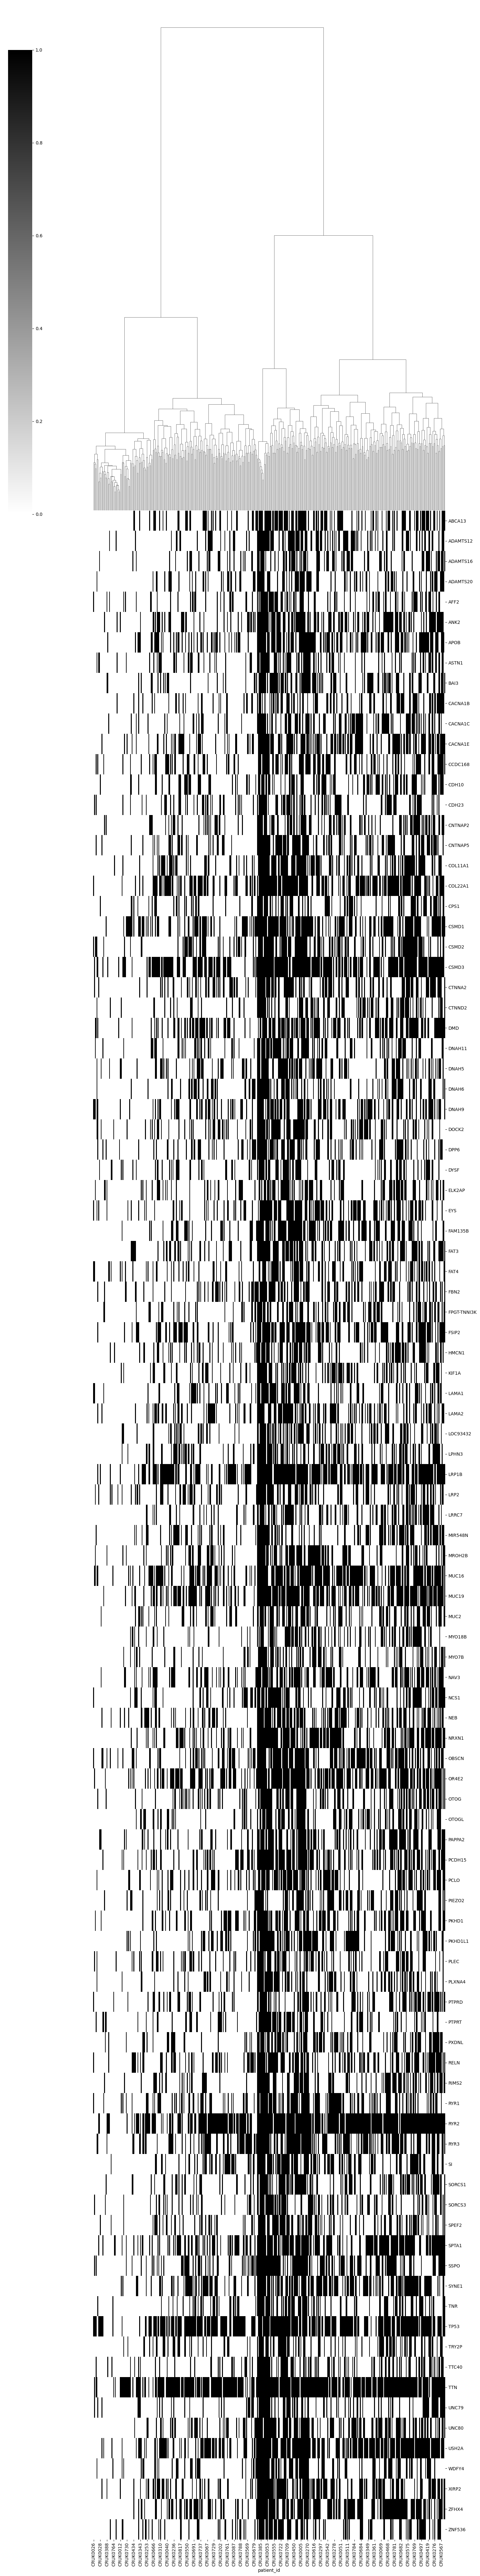

In [12]:
# Filter columns with at least one 1
filtered_matrix = gene_matrix.loc[:, (gene_matrix != 0).any(axis=0)]

# Create a Seaborn cluster map
sns.clustermap(filtered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 80))

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


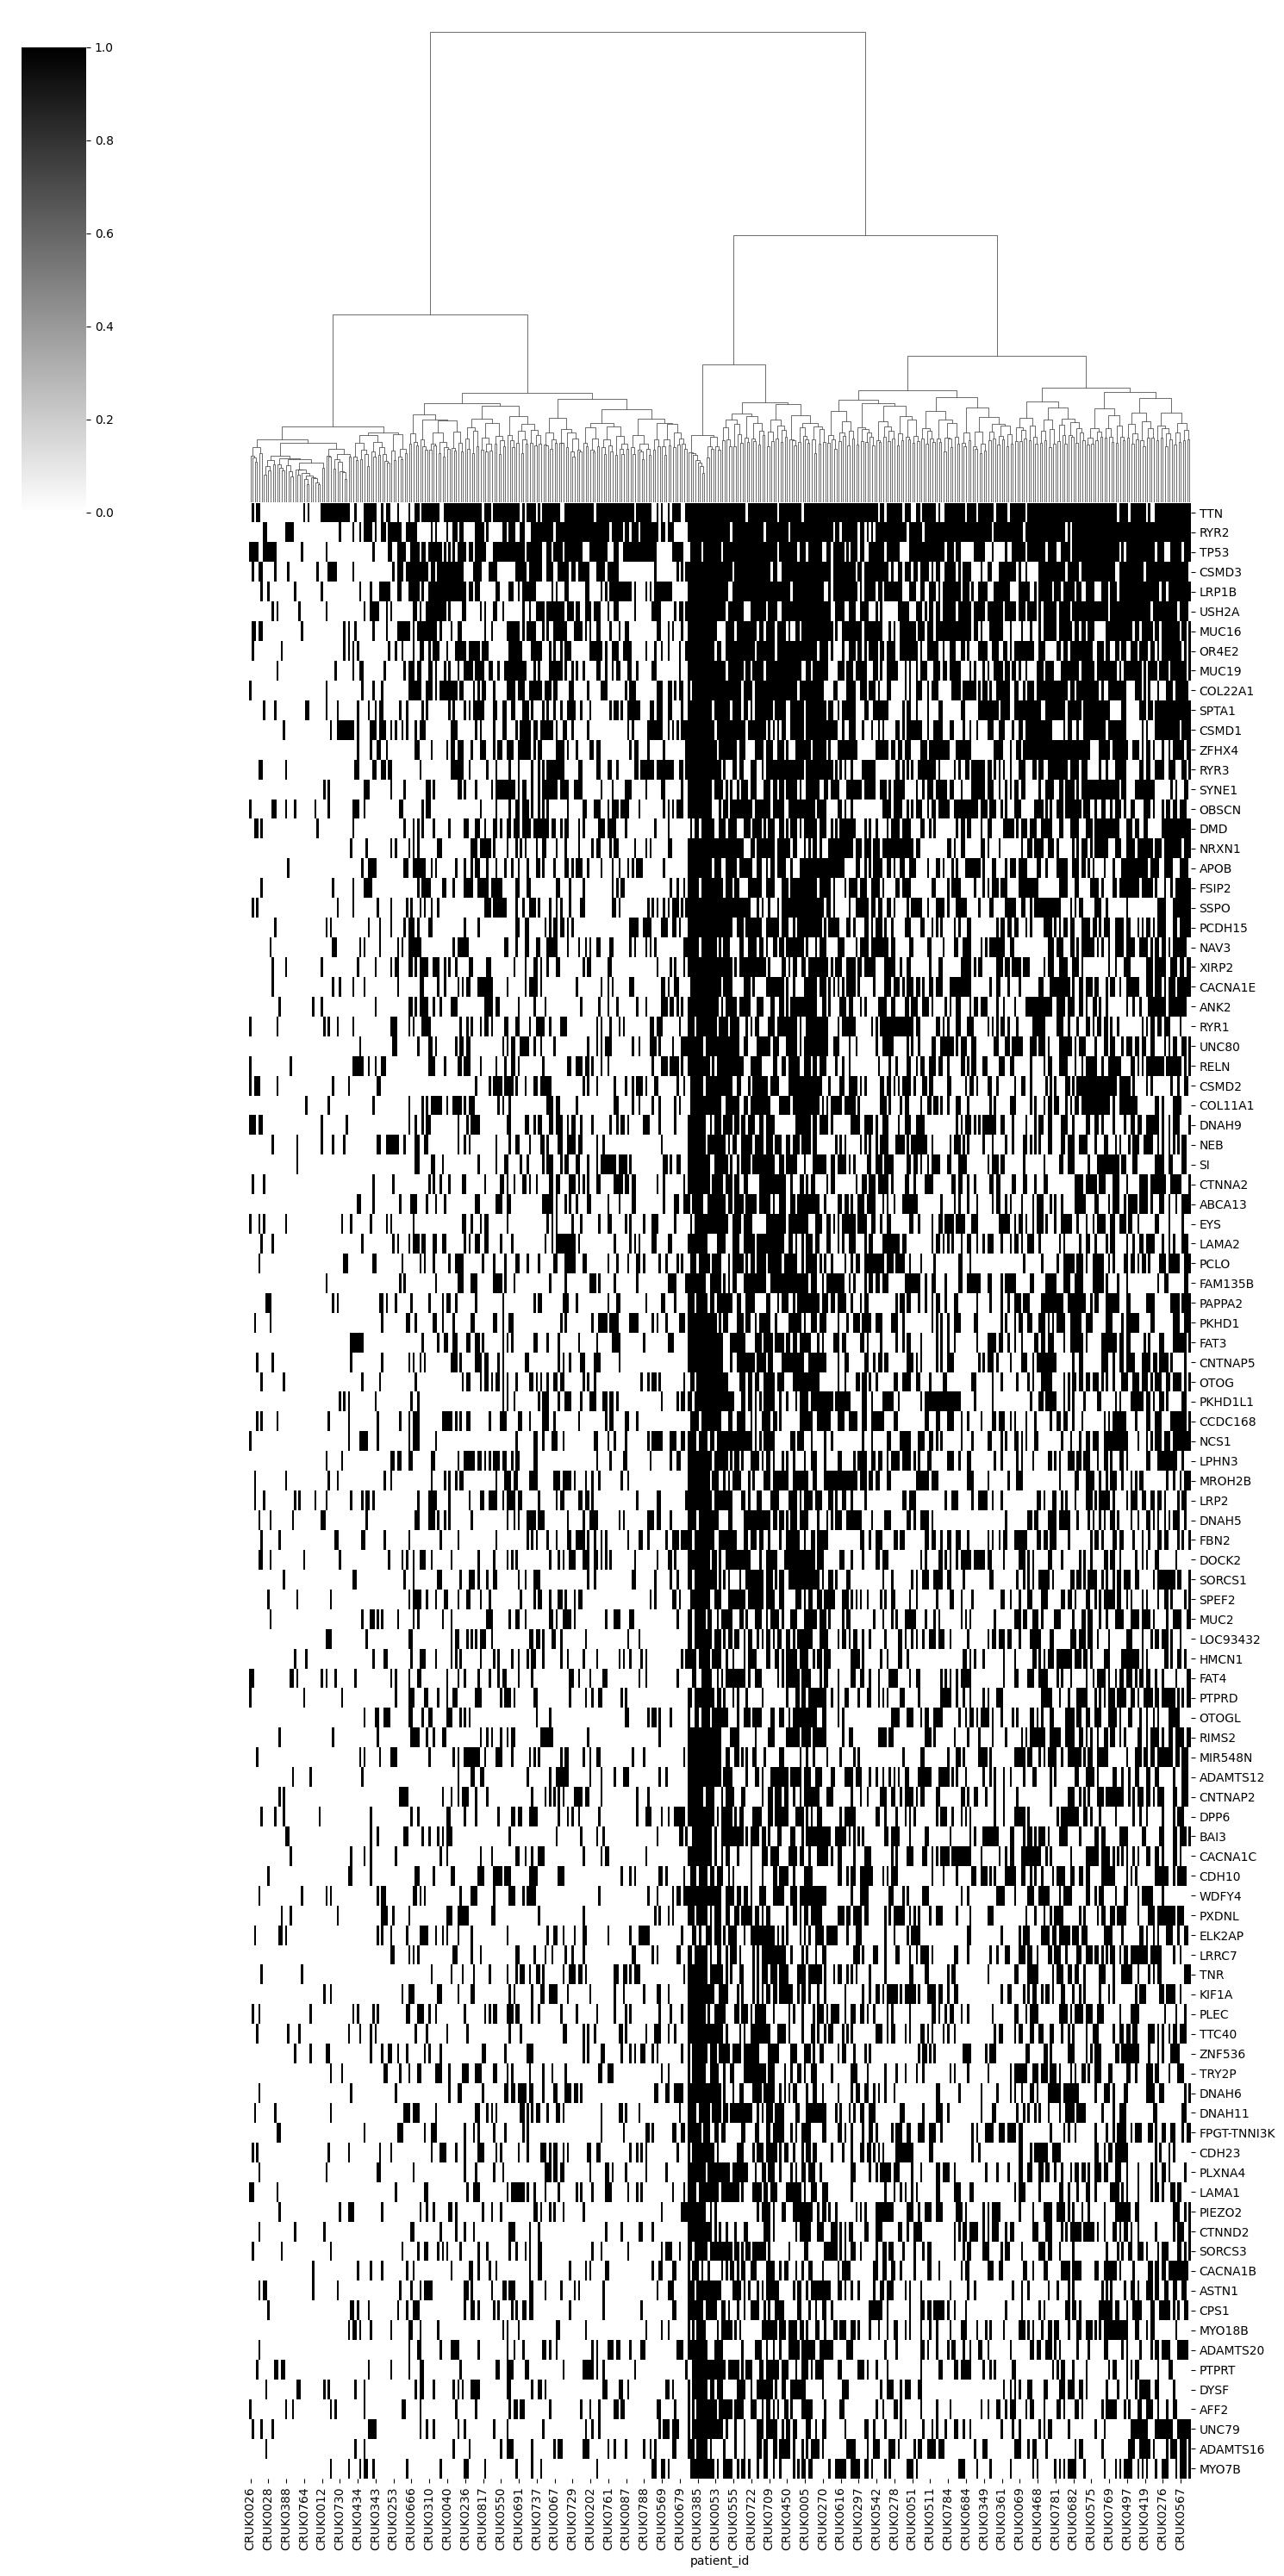

In [13]:
# Filter columns with at least one 1
filtered_matrix = gene_matrix.loc[:, (gene_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 30))

# Show the plot
plt.show()

In [29]:
fifty_gene_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/50_gene_matrix.csv')
fifty_driver_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/50_driver_matrix.csv')
fifty_gene_matrix = fifty_gene_matrix.set_index('patient_id')
fifty_driver_matrix = fifty_driver_matrix.set_index('patient_id')

In [30]:
twenty_gene_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/20_gene_matrix.csv')
twenty_driver_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/20_driver_matrix.csv')
twenty_gene_matrix = twenty_gene_matrix.set_index('patient_id')
twenty_driver_matrix = twenty_driver_matrix.set_index('patient_id')

In [3]:
ten_driver_matrix = pd.read_csv('/Users/jasminechau/PycharmProjects/pythonProject1/INIM0038/Matrices/10_driver_matrix.csv')
ten_driver_matrix = ten_driver_matrix.set_index('patient_id')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


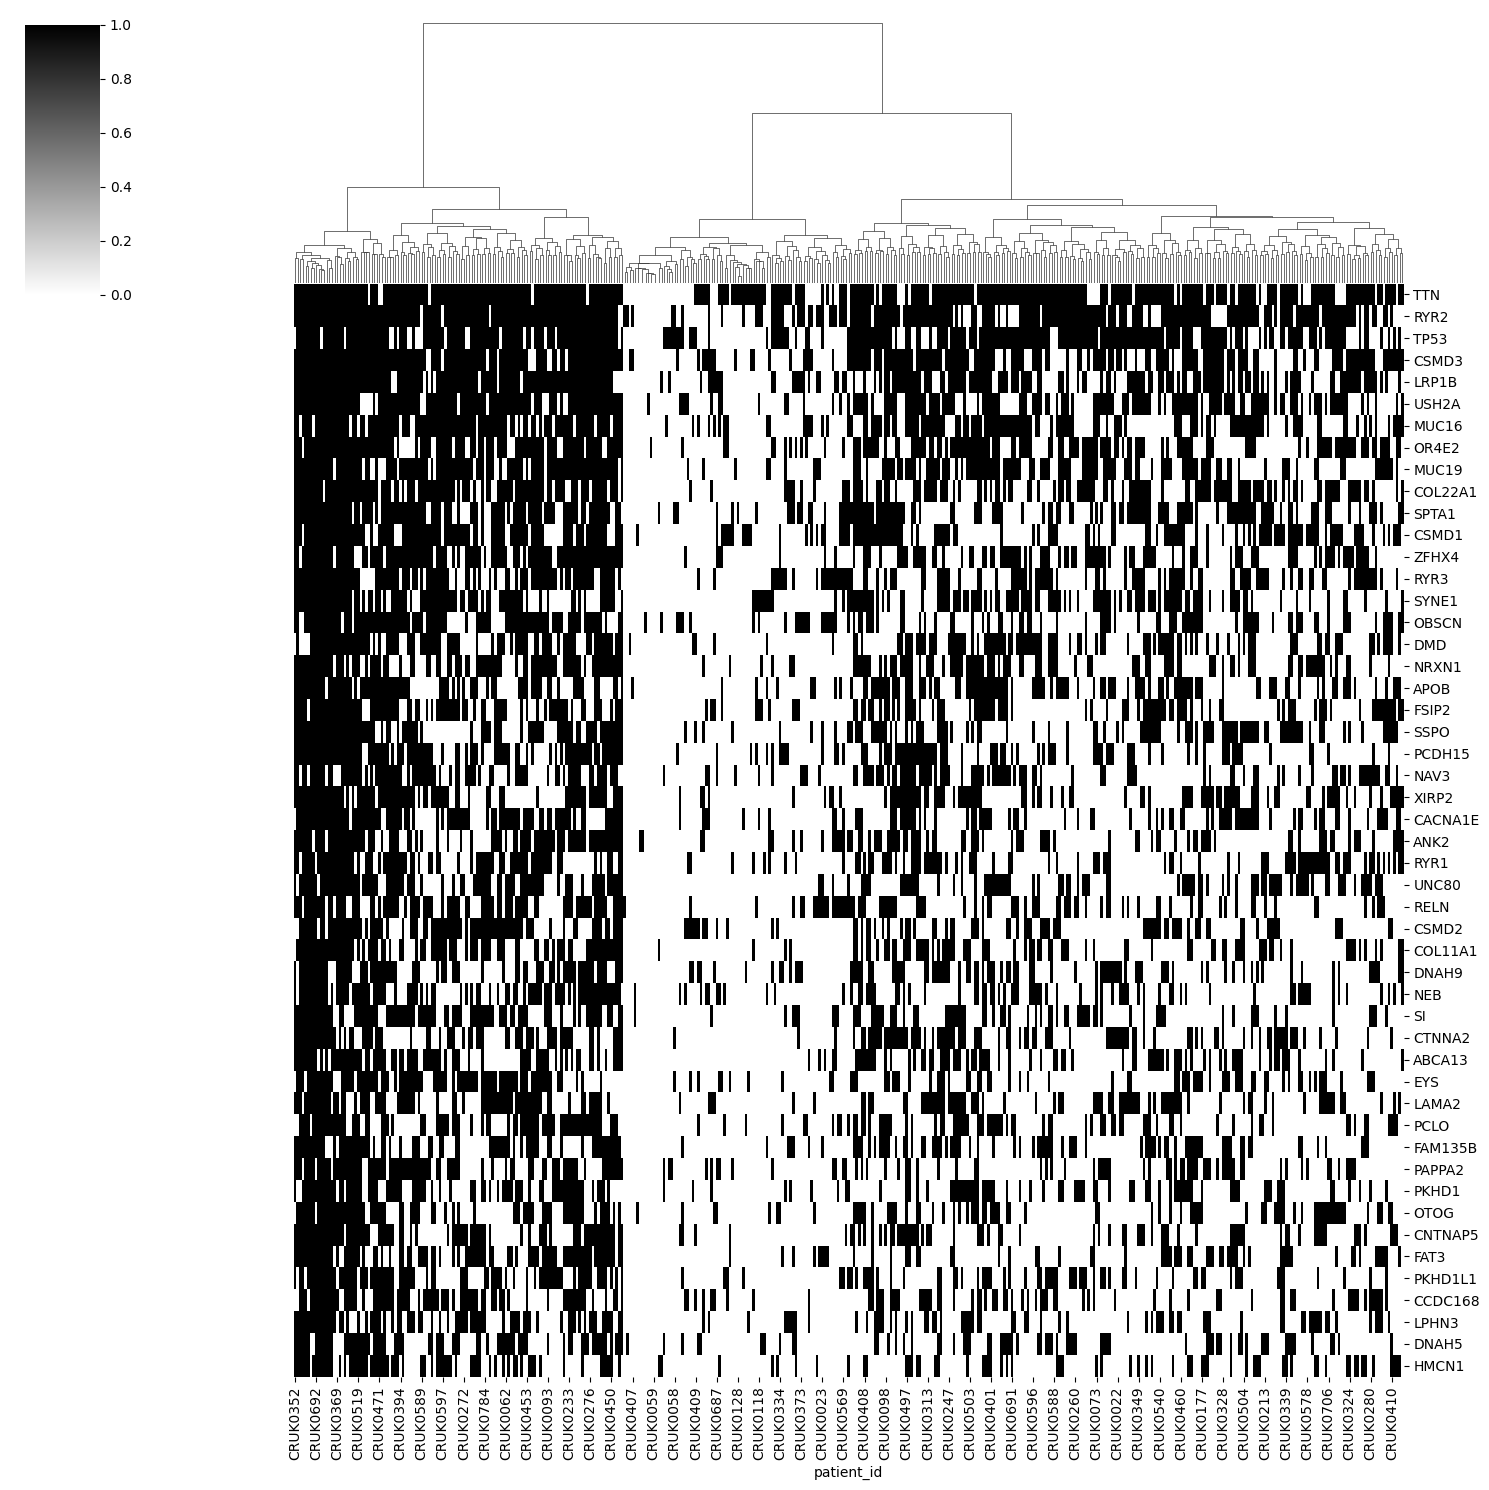

In [31]:
# Filter columns with at least one 1
filtered_matrix = fifty_gene_matrix.loc[:, (fifty_gene_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 15))

# Show the plot
plt.show()

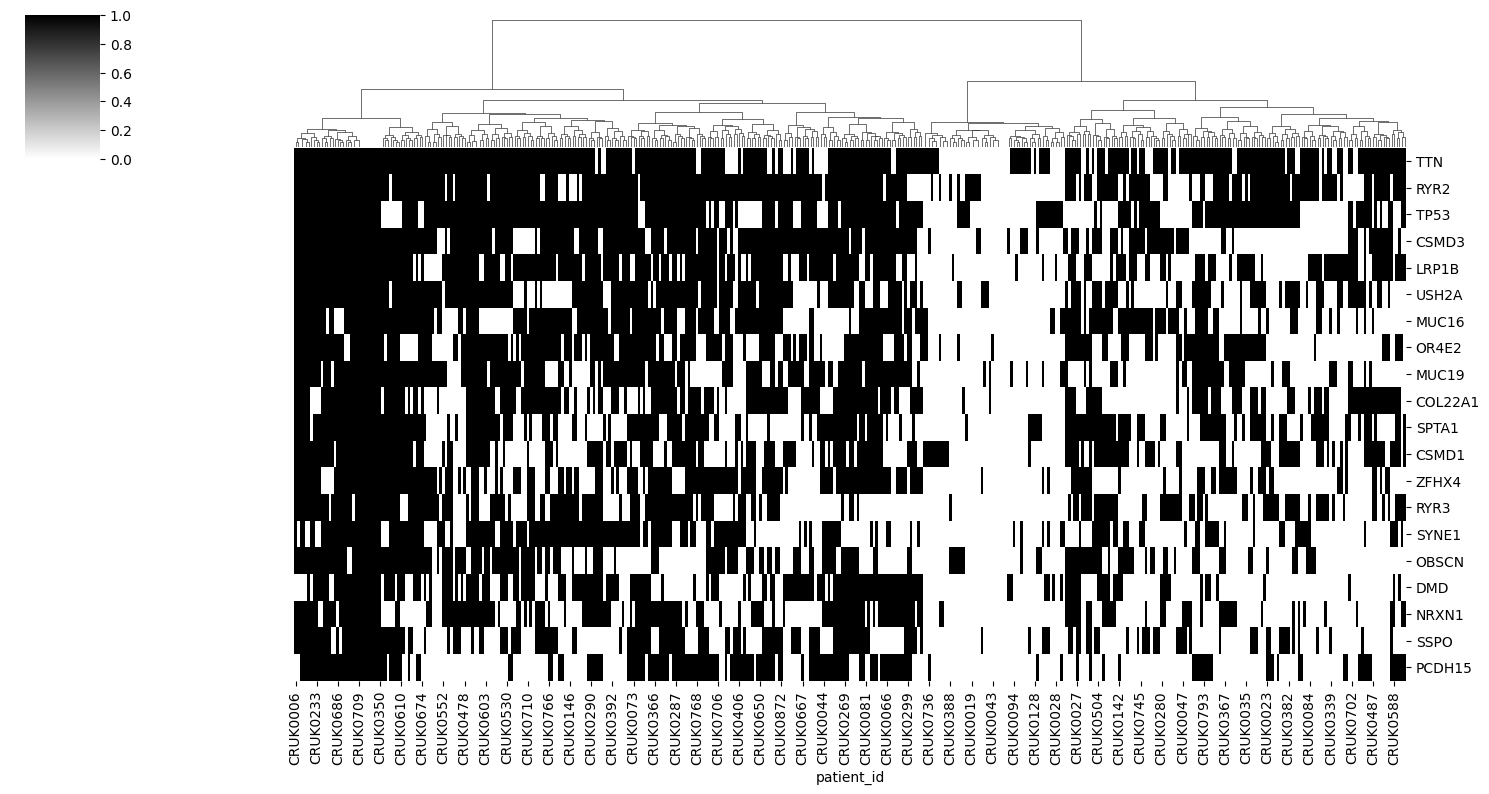

In [32]:
# Filter columns with at least one 1
filtered_matrix = twenty_gene_matrix.loc[:, (twenty_gene_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 8))

# Show the plot
plt.show()

In [34]:
driver_matrix

,patient_id,ACVR1B,AMER1,APC,ARHGAP35,ARID1A,ARID1B,ARID2,ASXL1,ASXL2,...,STAG2,STK11,TET2,TP53,TP53BP1,TSC2,UBR5,WT1,ZFP36L1,ZMYM2
0,CRUK0001,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CRUK0002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CRUK0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CRUK0004,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,CRUK0005,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,CRUK0861,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
417,CRUK0864,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,CRUK0872,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
419,CRUK0881,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


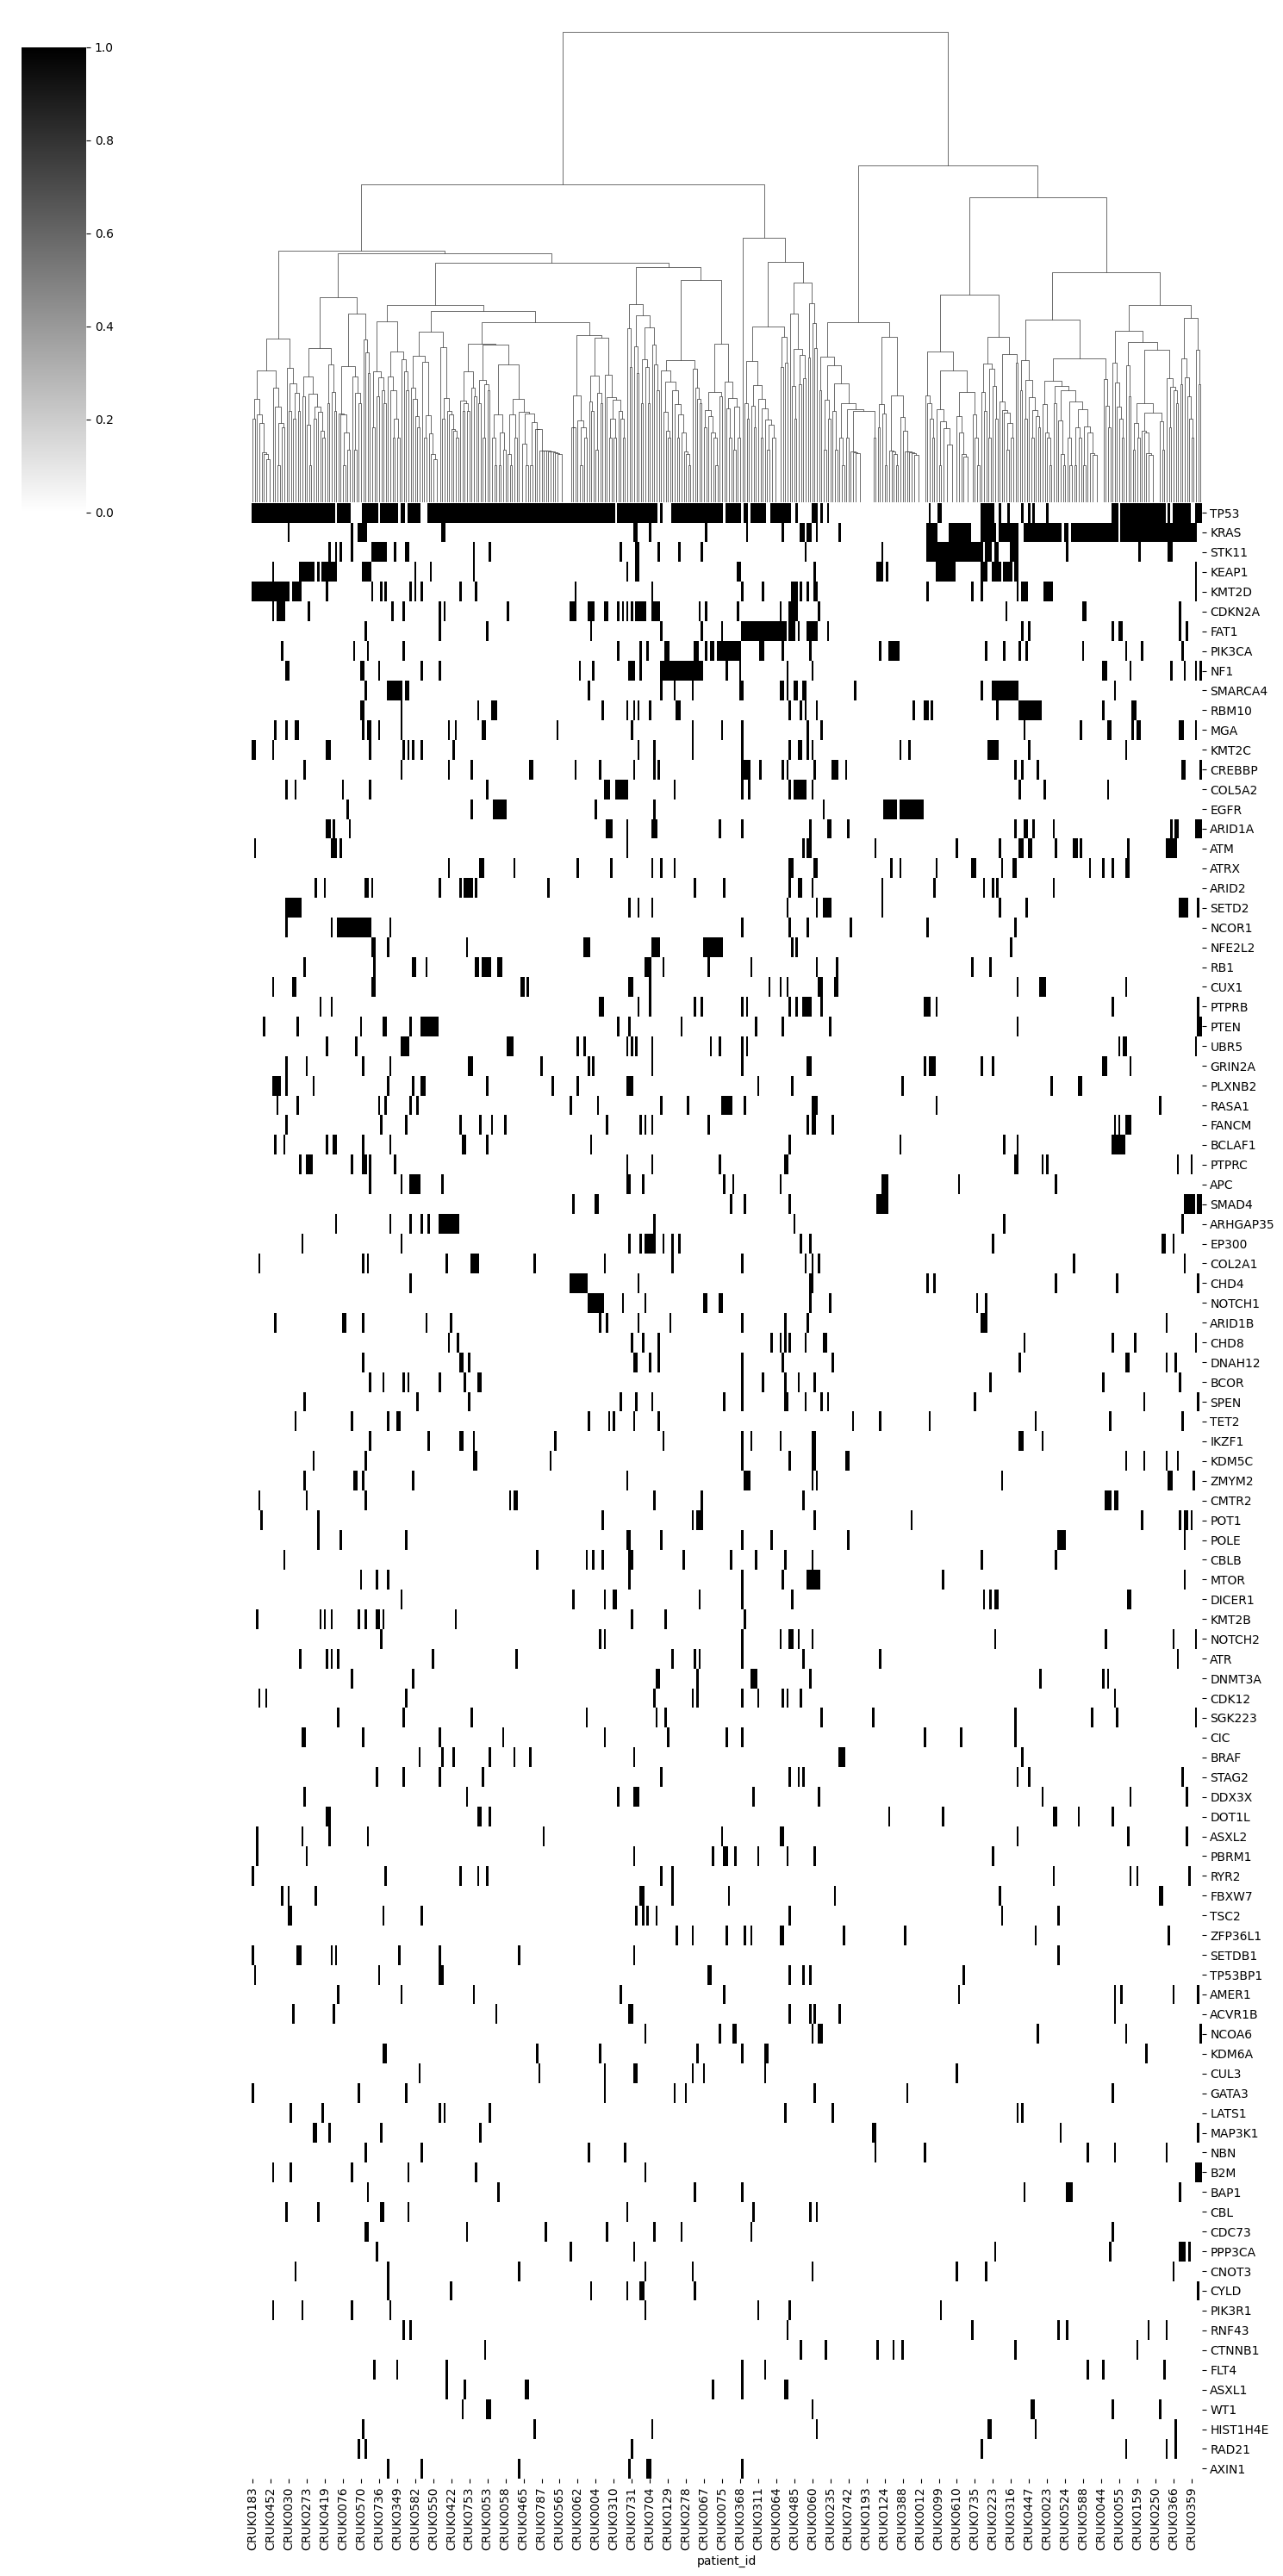

In [38]:
# Filter columns with at least one 1
filtered_matrix = driver_matrix.loc[:, (driver_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 30))

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


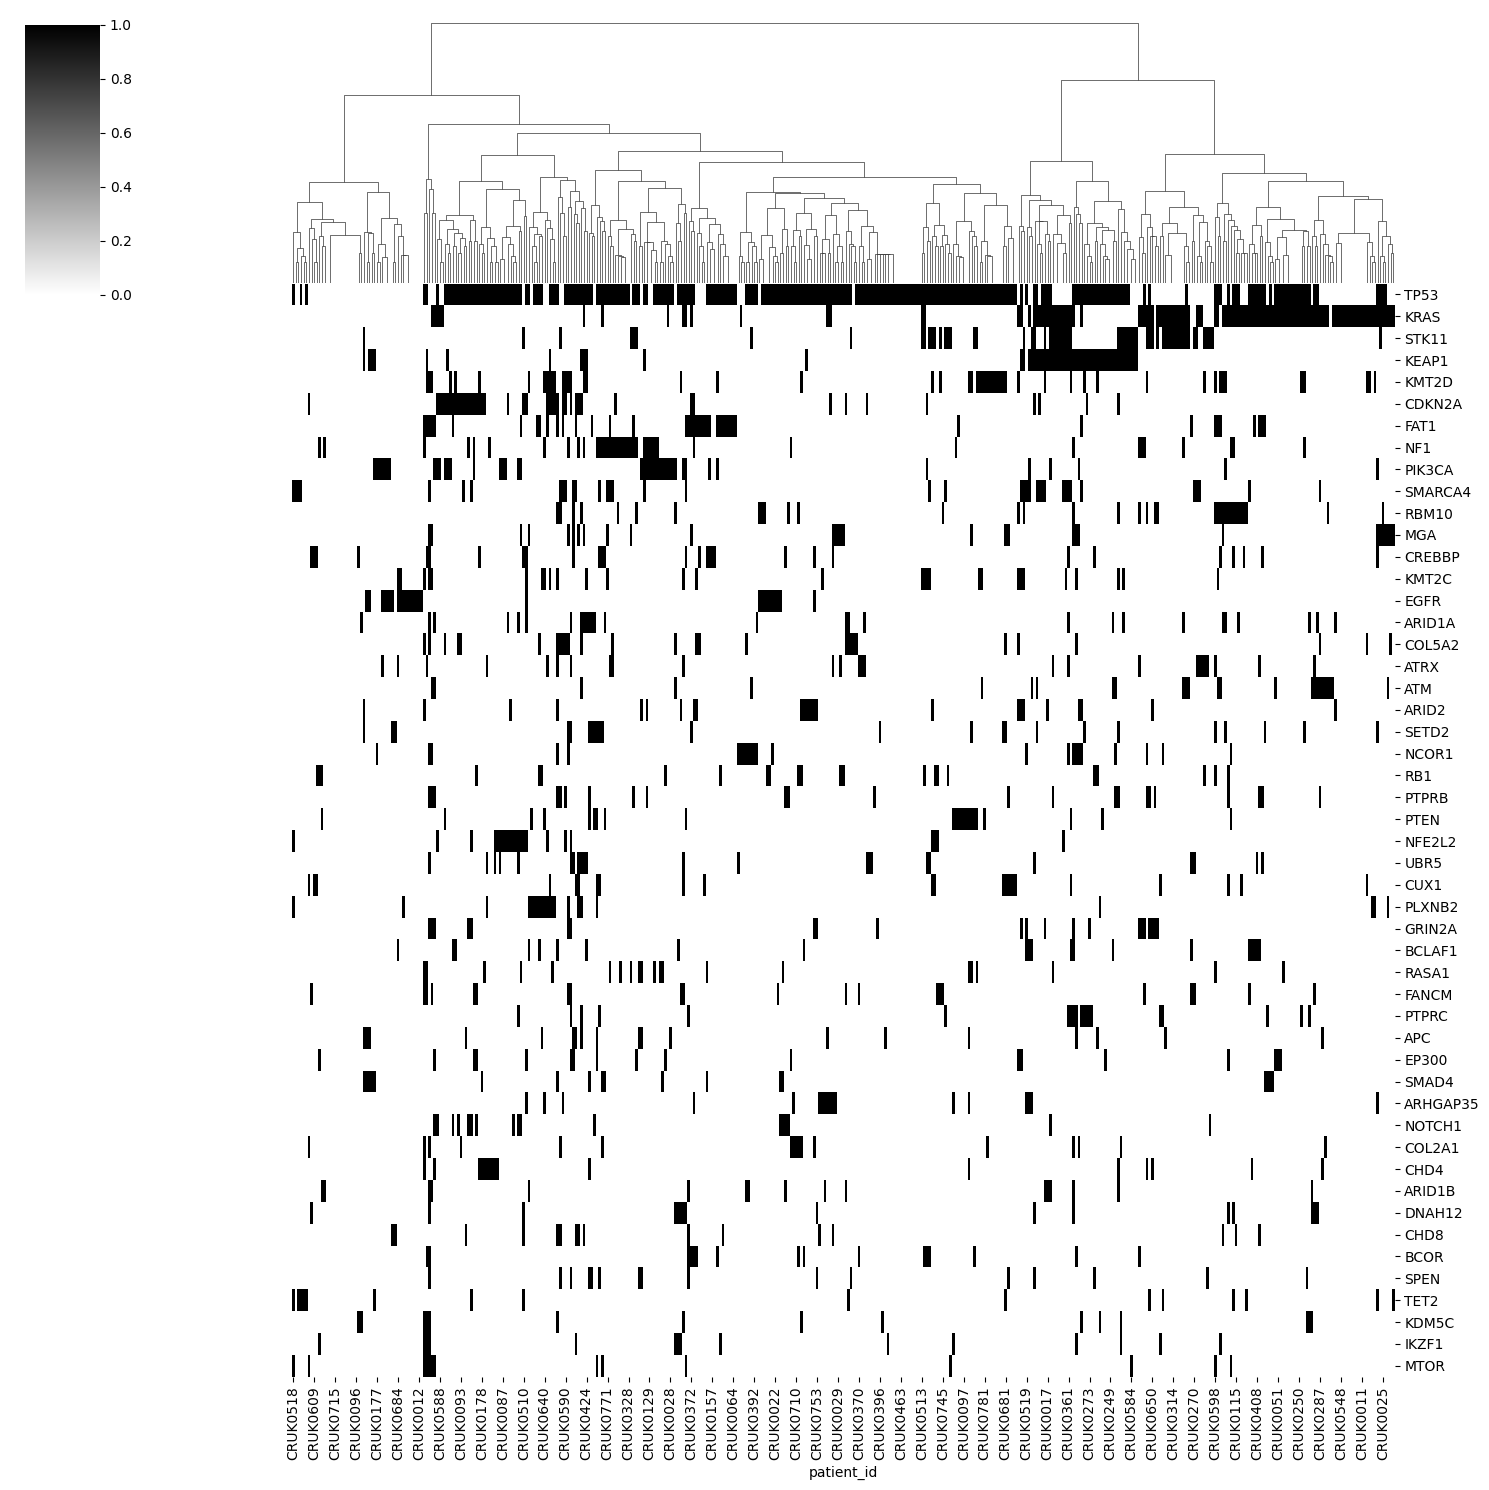

In [39]:
# Filter columns with at least one 1
filtered_matrix = fifty_driver_matrix.loc[:, (fifty_driver_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 15))

# Show the plot
plt.show()

Index(['TP53', 'KRAS', 'STK11', 'KEAP1', 'KMT2D', 'CDKN2A', 'FAT1', 'NF1',
       'PIK3CA', 'SMARCA4', 'RBM10', 'MGA', 'CREBBP', 'KMT2C', 'EGFR',
       'COL5A2', 'ARID1A', 'ATM', 'ATRX', 'SETD2'],
      dtype='object')


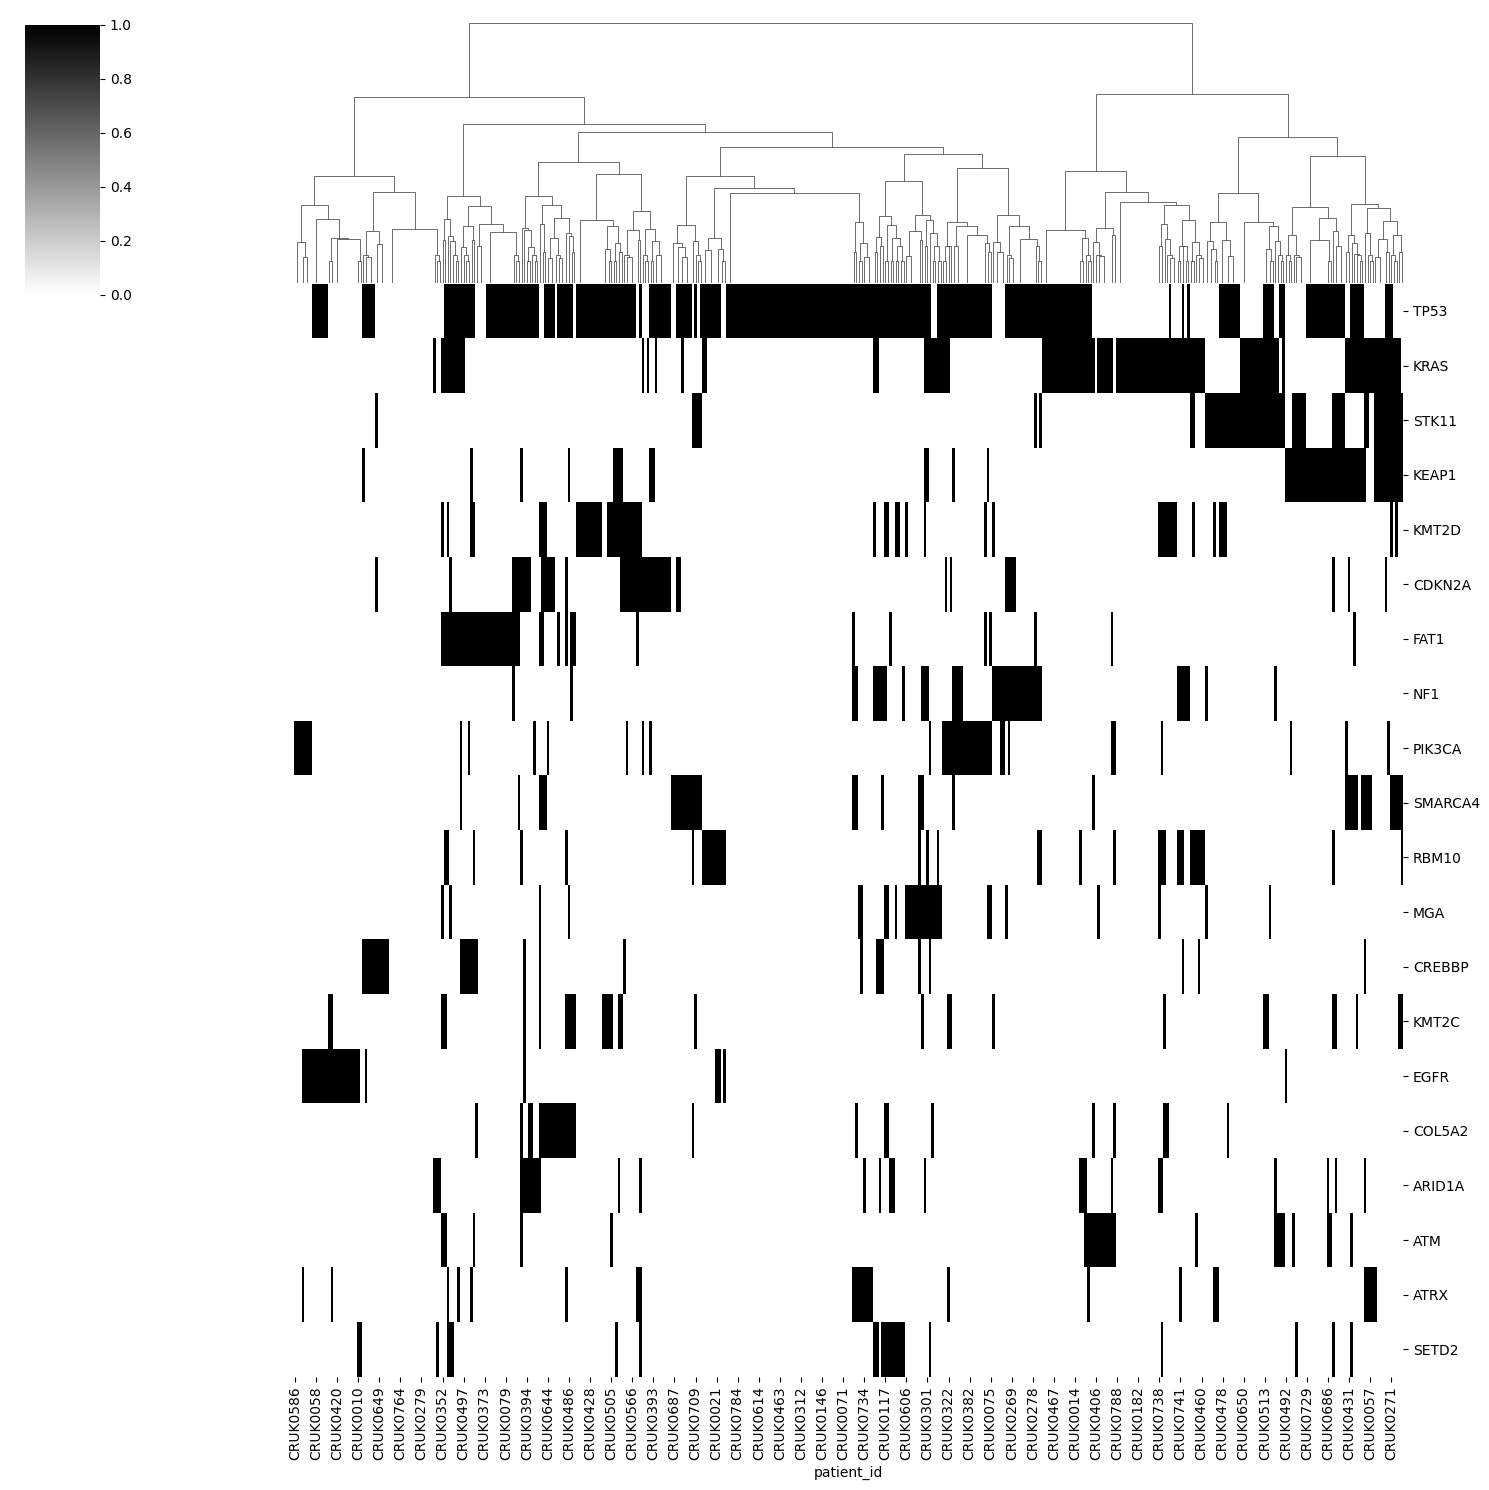

In [40]:
# Filter columns with at least one 1
filtered_matrix = twenty_driver_matrix.loc[:, (twenty_driver_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index
print(ordered_columns)

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 15))

# Show the plot
plt.show()

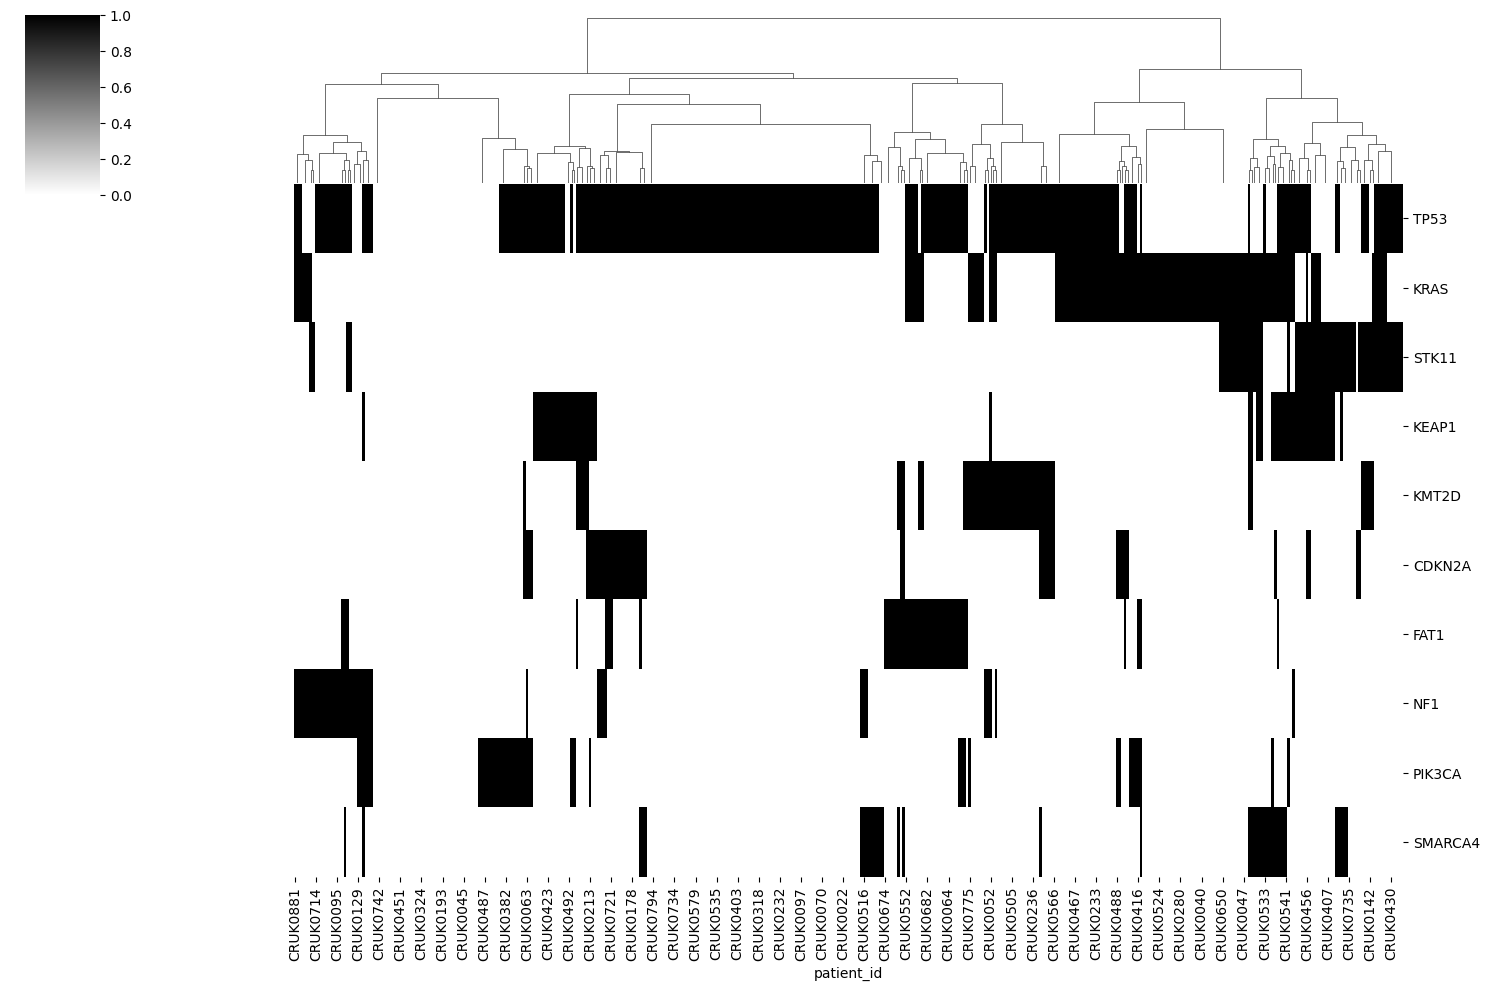

In [5]:
# Filter columns with at least one 1
filtered_matrix = ten_driver_matrix.loc[:, (ten_driver_matrix != 0).any(axis=0)]

# Order columns (genes) by the sum of 1s in each column
ordered_columns = filtered_matrix.sum(axis=0).sort_values(ascending=False).index

# Sort the DataFrame columns based on the calculated order
ordered_matrix = filtered_matrix[ordered_columns]

# Create a Seaborn cluster map
sns.clustermap(ordered_matrix.T, cmap="binary", method='ward', row_cluster=False, col_cluster=True, figsize=(15, 10))

# Show the plot
plt.show()

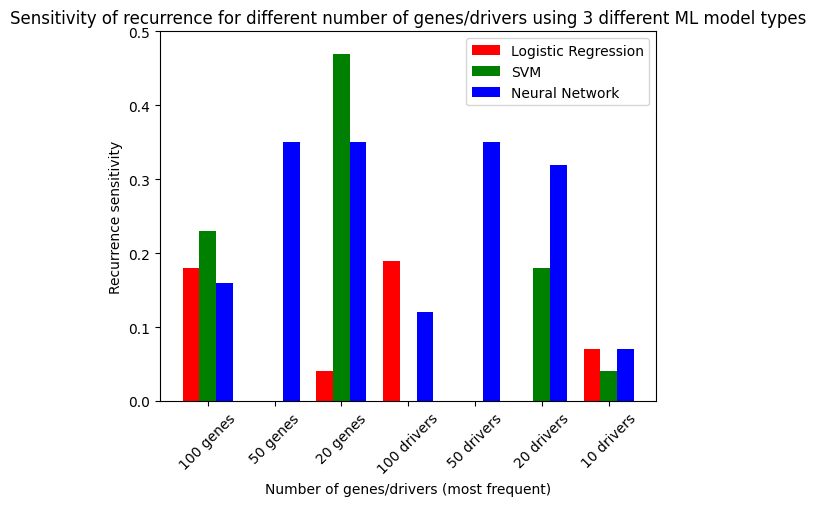

In [6]:
logistic_100_10_recurrence_recall = [0.18,0,0.04,0.19,0,0,0.07]
svm_100_10_recurrence_recall = [0.23,0,0.47,0,0,0.18,0.04]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]

x = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars
plt.bar(x_pos - barWidth, logistic_100_10_recurrence_recall, color='red', width=barWidth, label='Logistic Regression')
plt.bar(x_pos, svm_100_10_recurrence_recall, color='green', width=barWidth, label='SVM')
plt.bar(x_pos + barWidth, neural_100_10_recurrence_recall, color='blue', width=barWidth, label='Neural Network')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence sensitivity')
plt.ylim(0, 0.5)
plt.title('Sensitivity of recurrence for different number of genes/drivers using 3 different ML model types')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


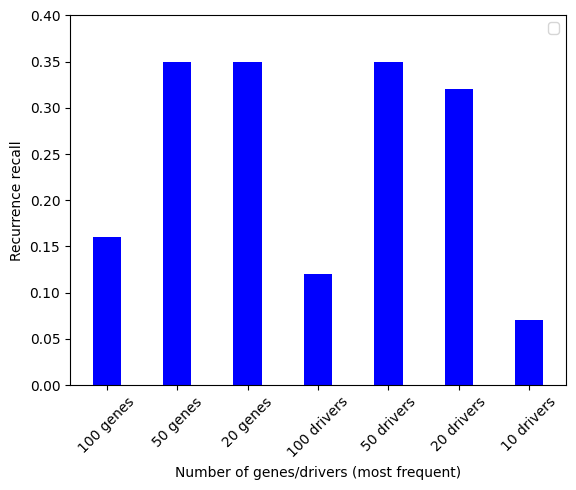

In [7]:
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]

x = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars
plt.bar(x_pos, neural_100_10_recurrence_recall, color='blue', width=barWidth)

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.4)
# plt.title('Recurrence recall for different number of genes/drivers')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


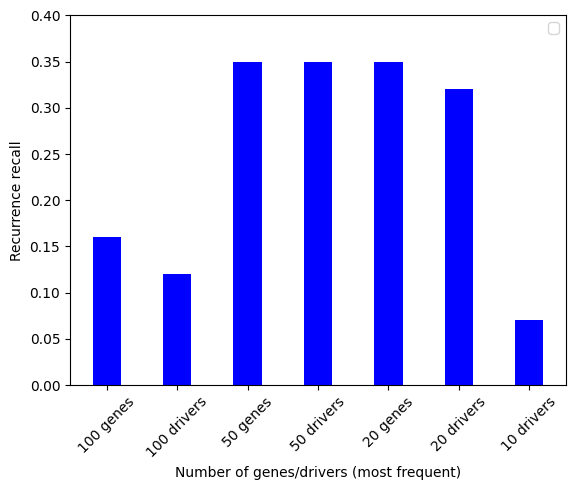

In [23]:
neural_100_10_recurrence_recall = [0.16,0.12,0.35,0.35,0.35,0.32,0.07]

x = ['100 genes', '100 drivers', '50 genes', '50 drivers', '20 genes', '20 drivers', '10 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars
plt.bar(x_pos, neural_100_10_recurrence_recall, color='blue', width=barWidth)

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.4)
# plt.title('Recurrence recall for different number of genes/drivers')
plt.legend()

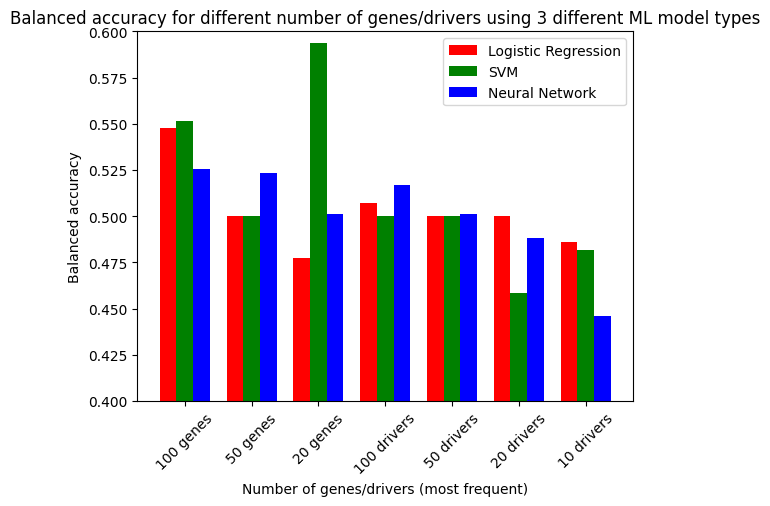

In [8]:
logistic_100_10_balanced_accuracy = [0.547540727,0.5,0.477365288,0.507205514,0.5,0.5,0.485980576]
svm_100_10_balanced_accuracy = [0.551535088,0.5,0.593984962,0.5,0.5,0.458255013,0.481829574]
neural_100_10_balanced_accuracy = [0.52537594,0.523652882,0.501331454,0.516760652,0.501331454,0.48825188,0.445802005]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars
plt.bar(x_pos - barWidth, logistic_100_10_balanced_accuracy, color='red', width=barWidth, label='Logistic Regression')
plt.bar(x_pos, svm_100_10_balanced_accuracy, color='green', width=barWidth, label='SVM')
plt.bar(x_pos + barWidth, neural_100_10_balanced_accuracy, color='blue', width=barWidth, label='Neural Network')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.6)
plt.title('Balanced accuracy for different number of genes/drivers using 3 different ML model types')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


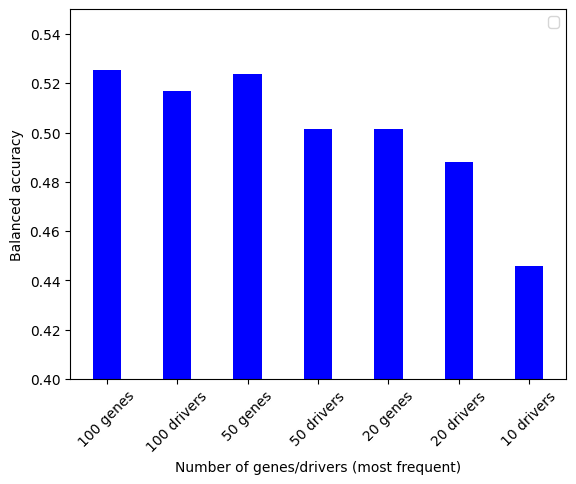

In [9]:
neural_100_10_balanced_accuracy = [0.52537594,0.516760652,0.523652882,0.501331454,0.501331454,0.48825188,0.445802005]
x = ['100 genes', '100 drivers', '50 genes', '50 drivers', '20 genes', '20 drivers', '10 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars
plt.bar(x_pos, neural_100_10_balanced_accuracy, color='blue', width=barWidth)

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.55)
# plt.title('Balanced accuracy for different number of genes/drivers')
plt.legend()

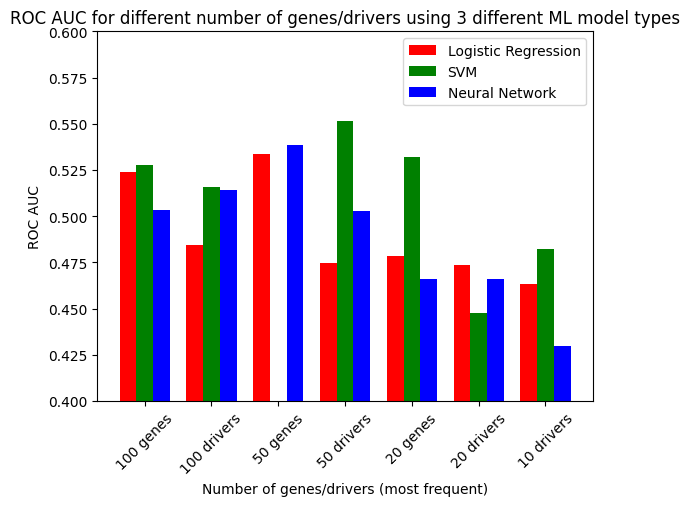

In [10]:
logistic_100_10_ROC_AUC = [0.523809524,0.48433584,0.533756266,0.474859023,0.478305138,0.473527569,0.463580827]
svm_100_10_ROC_AUC = [0.527725564,0.515977444,0.369282581,0.551456767,0.53218985,0.447525063,0.482221178]
neural_100_10_ROC_AUC = [0.503446115,0.514411028,0.538455514,0.50297619,0.466243734,0.466087093,0.429589599]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars
plt.bar(x_pos - barWidth, logistic_100_10_ROC_AUC, color='red', width=barWidth, label='Logistic Regression')
plt.bar(x_pos, svm_100_10_ROC_AUC, color='green', width=barWidth, label='SVM')
plt.bar(x_pos + barWidth, neural_100_10_ROC_AUC, color='blue', width=barWidth, label='Neural Network')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.6)
plt.title('ROC AUC for different number of genes/drivers using 3 different ML model types')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


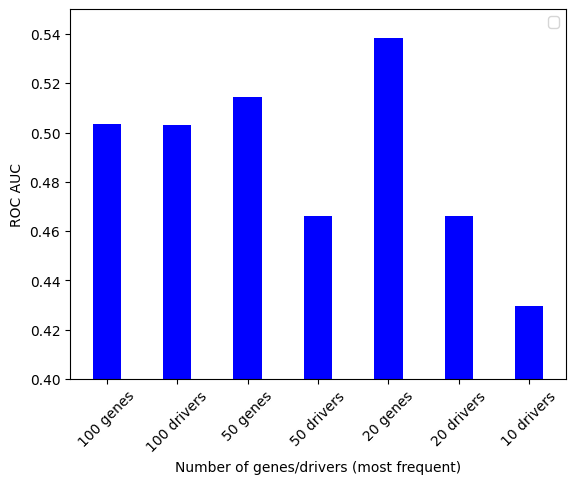

In [11]:
neural_100_10_ROC_AUC = [0.503446115,0.50297619,0.514411028,0.466243734,0.538455514,0.466087093,0.429589599]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars
plt.bar(x_pos, neural_100_10_ROC_AUC, color='blue', width=barWidth)

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.55)
# plt.title('ROC AUC for different number of genes/drivers')
plt.legend()

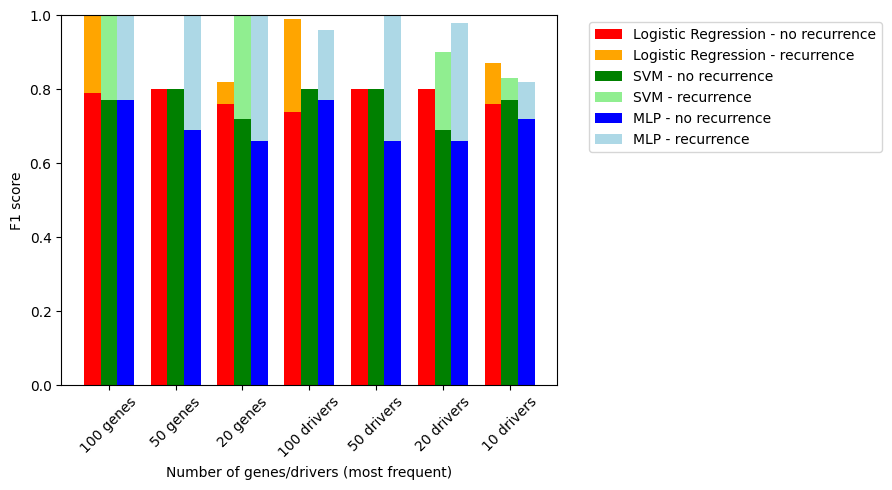

In [12]:
logistic_100_10_f1_recurrence = [0.26,0,0.06,0.25,0,0,0.11]
logistic_100_10_f1_no_recurrence = [0.79,0.8,0.76,0.74,0.8,0.8,0.76]
svm_100_10_f1_recurrence = [0.31,0,0.47,0,0,0.21,0.06]
svm_100_10_f1_no_recurrence = [0.77,0.8,0.72,0.8,0.8,0.69,0.77]
neural_100_10_f1_recurrence = [0.23,0.36,0.34,0.19,0.34,0.32,0.1]
neural_100_10_f1_no_recurrence = [0.77,0.69,0.66,0.77,0.66,0.66,0.72]
x = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars
plt.bar(x_pos - barWidth, logistic_100_10_f1_no_recurrence, color='red', width=barWidth, label='Logistic Regression - no recurrence')
plt.bar(x_pos - barWidth, logistic_100_10_f1_recurrence, color='orange', width=barWidth, bottom=logistic_100_10_f1_no_recurrence, label='Logistic Regression - recurrence')
plt.bar(x_pos, svm_100_10_f1_no_recurrence, color='green', width=barWidth, label='SVM - no recurrence')
plt.bar(x_pos, svm_100_10_f1_recurrence, color='lightgreen', width=barWidth, bottom=svm_100_10_f1_no_recurrence, label='SVM - recurrence')
plt.bar(x_pos + barWidth, neural_100_10_f1_no_recurrence, color='blue', width=barWidth, label='MLP - no recurrence')
plt.bar(x_pos + barWidth, neural_100_10_f1_recurrence, color='lightblue', width=barWidth, bottom=neural_100_10_f1_no_recurrence,label='MLP - recurrence')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('F1 score')
plt.ylim(0, 1)

# plt.title('F1 Score for different number of genes/drivers using 3 different ML model types')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

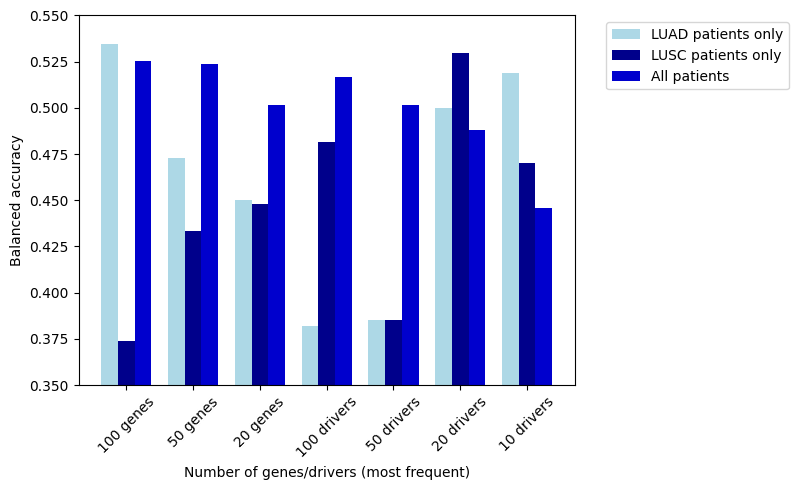

In [13]:
LUAD_balanced_accuracy = [0.534759358,0.472816399,0.450089127,0.381907308,0.385026738,0.5,0.518716578]
LUSC_balanced_accuracy = [0.374074074,0.433333333,0.448148148,0.481481481,0.385185185,0.52962963,0.47037037]
neural_100_10_balanced_accuracy = [0.52537594,0.523652882,0.501331454,0.516760652,0.501331454,0.48825188,0.445802005]
x = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars

plt.bar(x_pos - barWidth, LUAD_balanced_accuracy, color='lightblue', width=barWidth, label='LUAD patients only')
plt.bar(x_pos, LUSC_balanced_accuracy, color='darkblue', width=barWidth, label='LUSC patients only')
plt.bar(x_pos + barWidth, neural_100_10_balanced_accuracy, color='mediumblue', width=barWidth, label='All patients')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.35, 0.55)
# plt.title('Balanced accuracy for different number of genes/drivers in separate LUAD and LUSC cohorts')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

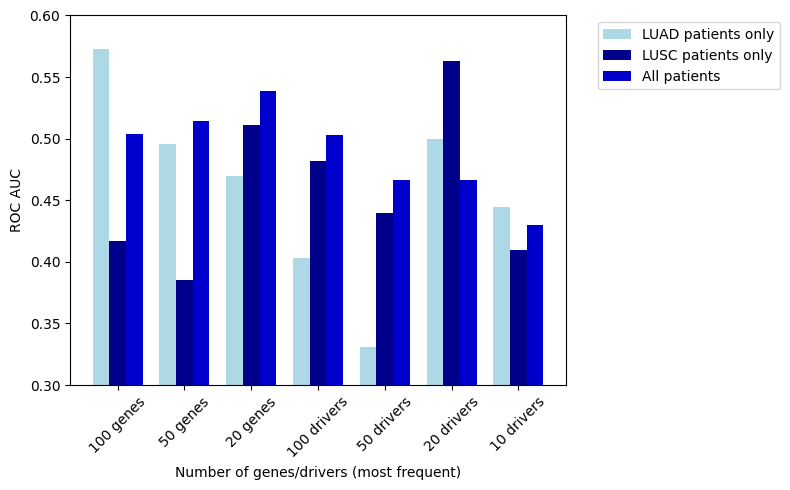

In [14]:
LUAD_ROC_AUC = [0.573083779,0.495543672,0.46969697,0.40285205,0.330659537,0.5,0.4442959]
LUSC_ROC_AUC = [0.417283951,0.385185185,0.511111111,0.481481481,0.439506173,0.562962963,0.409876543]
neural_100_10_ROC_AUC = [0.503446115,0.514411028,0.538455514,0.50297619,0.466243734,0.466087093,0.429589599]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars

plt.bar(x_pos - barWidth, LUAD_ROC_AUC, color='lightblue', width=barWidth, label='LUAD patients only')
plt.bar(x_pos, LUSC_ROC_AUC, color='darkblue', width=barWidth, label='LUSC patients only')
plt.bar(x_pos + barWidth, neural_100_10_ROC_AUC, color='mediumblue', width=barWidth, label='All patients')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.30, 0.60)
# plt.title('ROC AUC for different number of genes/drivers in separate LUAD and LUSC cohorts')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

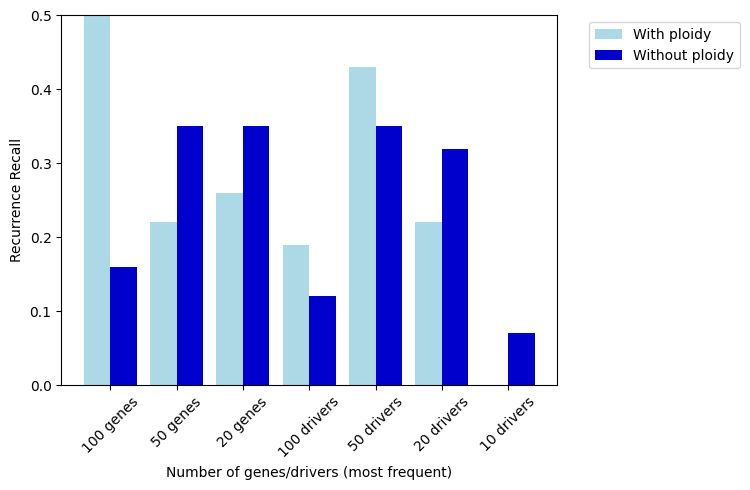

In [15]:
ploidy_recurrence_recall = [0.5,0.22,0.26,0.19,0.43,0.22,0]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, ploidy_recurrence_recall, color='lightblue', width=barWidth, label='With ploidy')
plt.bar(x_pos + 0.2, neural_100_10_recurrence_recall, color='mediumblue', width=barWidth, label='Without ploidy')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence Recall')
plt.ylim(0, 0.5)
# plt.title('Recurrence recall for different number of genes/drivers with and without ploidy')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

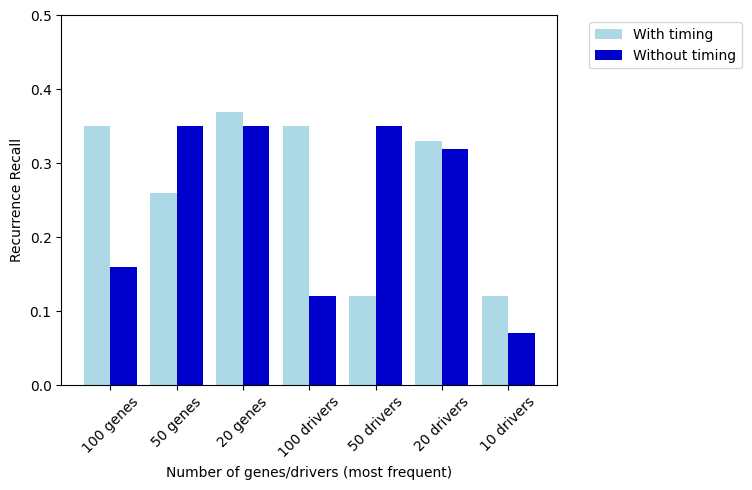

In [16]:
timing_recurrence_recall = [0.35,0.26,0.37,0.35,0.12,0.33,0.12]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, timing_recurrence_recall, color='lightblue', width=barWidth, label='With timing')
plt.bar(x_pos + 0.2, neural_100_10_recurrence_recall, color='mediumblue', width=barWidth, label='Without timing')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence Recall')
plt.ylim(0, 0.5)
# plt.title('Recurrence recall for different number of genes/drivers with and without timing of mutations')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

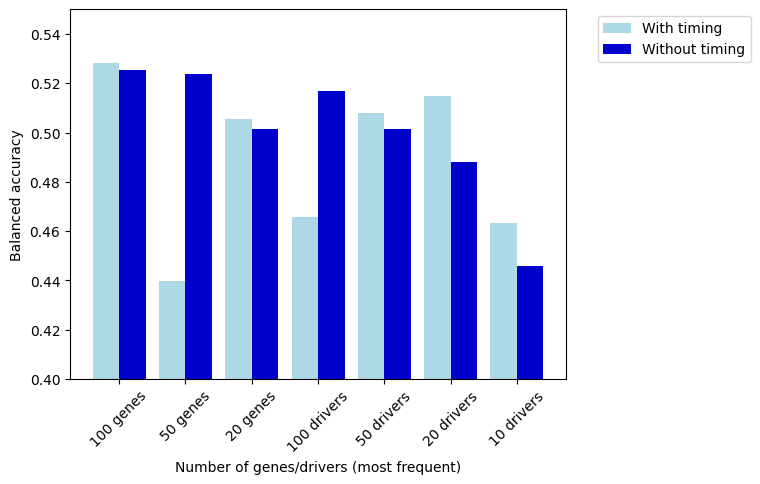

In [17]:
timing_balanced_accuracy = [0.528117168,0.439614662,0.505639098,0.465617168,0.50783208,0.514880952,0.463189223]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, timing_balanced_accuracy, color='lightblue', width=barWidth, label='With timing')
plt.bar(x_pos + 0.2, neural_100_10_balanced_accuracy, color='mediumblue', width=barWidth, label='Without timing')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.55)
# plt.title('Balanced accuracy for different number of genes/drivers with and without timing of mutations')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

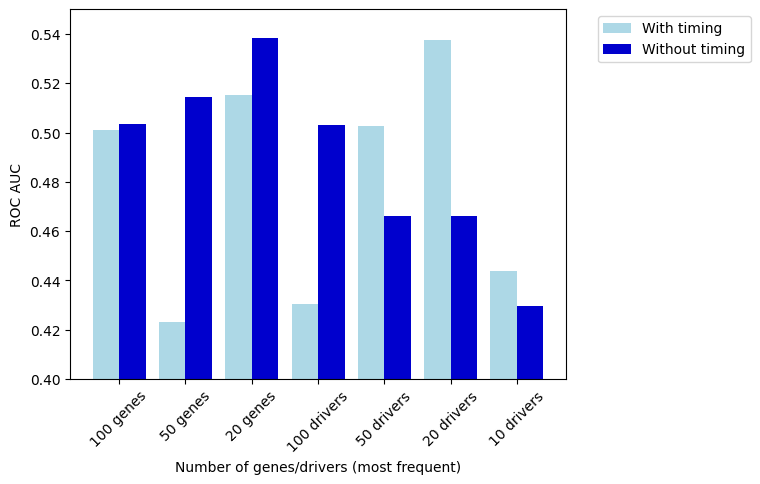

In [18]:
timing_ROC_AUC = [0.501253133,0.423167293,0.515350877,0.430607769,0.502662907,0.537593985,0.443687343]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, timing_ROC_AUC, color='lightblue', width=barWidth, label='With timing')
plt.bar(x_pos + 0.2, neural_100_10_ROC_AUC, color='mediumblue', width=barWidth, label='Without timing')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.55)
# plt.title('ROC AUC for different number of genes/drivers with and without timing of mutations')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

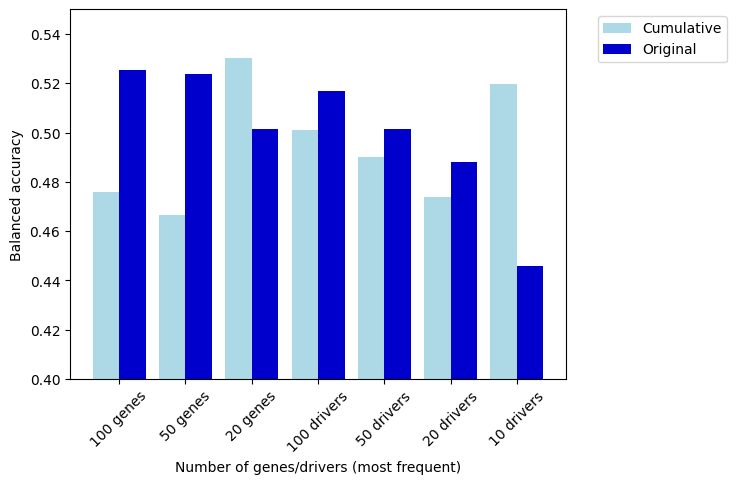

In [19]:
cumulative_balanced_accuracy = [0.475783476,0.466524217,0.530270655,0.501068376,0.490206553,0.474002849,0.519764957]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, cumulative_balanced_accuracy, color='lightblue', width=barWidth, label='Cumulative')
plt.bar(x_pos + 0.2, neural_100_10_balanced_accuracy, color='mediumblue', width=barWidth, label='Original')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.55)
# plt.title('Balanced accuracy for different number of genes/drivers with and without timing, ploidy and LUSD/LUSC features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')


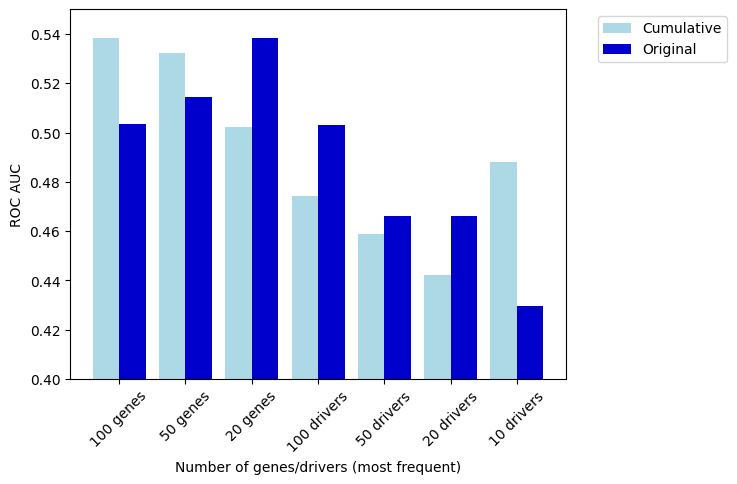

In [20]:
cumulative_ROC_AUC = [0.538283476,0.532229345,0.502314815,0.474358974,0.458956553,0.442396724,0.488069801]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.4

# Create the bars

plt.bar(x_pos - 0.2, cumulative_ROC_AUC, color='lightblue', width=barWidth, label='Cumulative')
plt.bar(x_pos + 0.2, neural_100_10_ROC_AUC, color='mediumblue', width=barWidth, label='Original')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.55)
# plt.title('ROC AUC for different number of genes/drivers with and without timing, ploidy and LUSD/LUSC features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

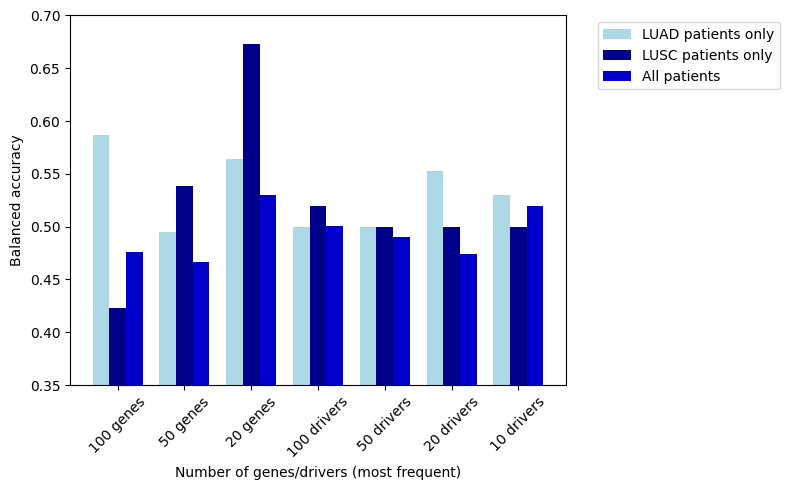

In [21]:
LUAD_balanced_accuracy = [0.534759358,0.472816399,0.450089127,0.381907308,0.385026738,0.5,0.518716578]
LUSC_balanced_accuracy = [0.374074074,0.433333333,0.448148148,0.481481481,0.385185185,0.52962963,0.47037037]
LUAD_cumulative_balanced_accuracy = [0.586956522,0.495059289,0.564229249,0.5,0.5,0.552371542,0.529644269]
LUSC_cumulative_balanced_accuracy = [0.423076923,0.538461538,0.673076923,0.519230769,0.5,0.5,0.5]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars

plt.bar(x_pos - barWidth, LUAD_cumulative_balanced_accuracy, color='lightblue', width=barWidth, label='LUAD patients only')
plt.bar(x_pos, LUSC_cumulative_balanced_accuracy, color='darkblue', width=barWidth, label='LUSC patients only')
plt.bar(x_pos + barWidth, cumulative_balanced_accuracy, color='mediumblue', width=barWidth, label='All patients')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.35, 0.7)
# plt.title('Balanced accuracy for different number of genes/drivers in separate LUAD and LUSC cohorts with and without timing and ploidy features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

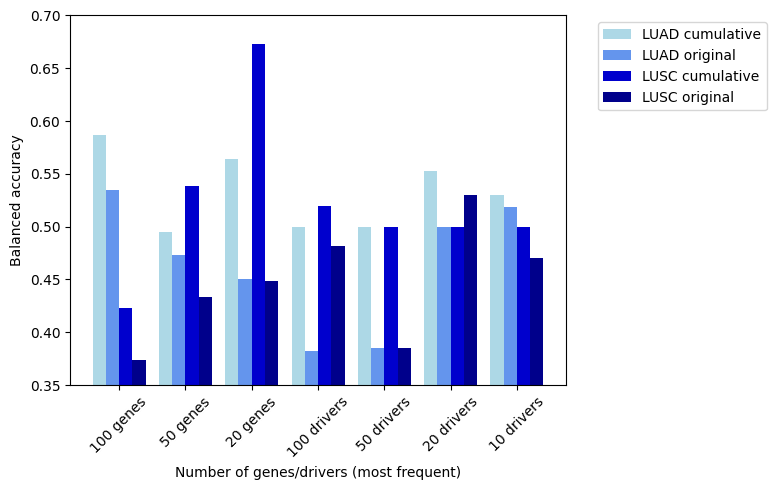

In [22]:
LUAD_balanced_accuracy = [0.534759358,0.472816399,0.450089127,0.381907308,0.385026738,0.5,0.518716578]
LUSC_balanced_accuracy = [0.374074074,0.433333333,0.448148148,0.481481481,0.385185185,0.52962963,0.47037037]
LUAD_cumulative_balanced_accuracy = [0.586956522,0.495059289,0.564229249,0.5,0.5,0.552371542,0.529644269]
LUSC_cumulative_balanced_accuracy = [0.423076923,0.538461538,0.673076923,0.519230769,0.5,0.5,0.5]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - barWidth*1.5, LUAD_cumulative_balanced_accuracy, color='lightblue', width=barWidth, label='LUAD cumulative')
plt.bar(x_pos - barWidth*0.5, LUAD_balanced_accuracy, color='cornflowerblue', width=barWidth, label='LUAD original')
plt.bar(x_pos + barWidth*0.5, LUSC_cumulative_balanced_accuracy, color='mediumblue', width=barWidth, label='LUSC cumulative')
plt.bar(x_pos + barWidth*1.5, LUSC_balanced_accuracy, color='darkblue', width=barWidth, label='LUSC original')



# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.35, 0.7)
# plt.title('Balanced accuracy for different number of genes/drivers in separate LUAD and LUSC cohorts with and without timing and ploidy features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

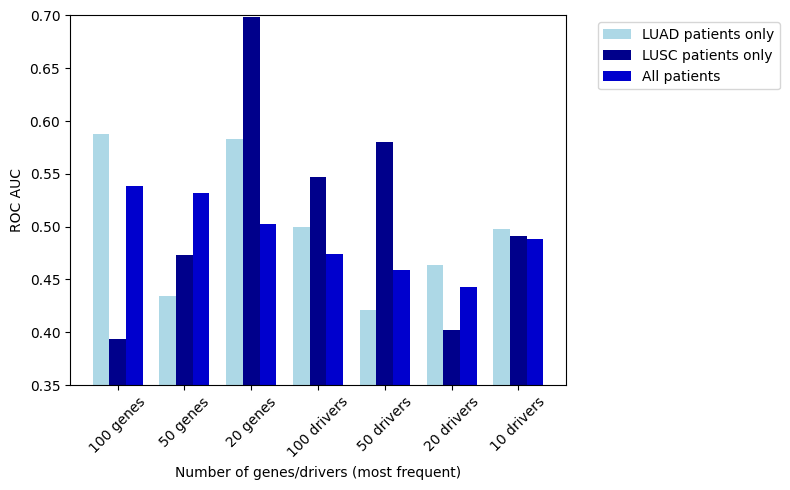

In [24]:
LUAD_ROC_AUC = [0.573083779,0.495543672,0.46969697,0.40285205,0.330659537,0.5,0.4442959]
LUSC_ROC_AUC = [0.417283951,0.385185185,0.511111111,0.481481481,0.439506173,0.562962963,0.409876543]
LUAD_cumulative_ROC_AUC = [0.587450593,0.434288538,0.583003953,0.5,0.421442688,0.463438735,0.497529644]
LUSC_cumulative_ROC_AUC = [0.393491124,0.473372781,0.698224852,0.547337278,0.579881657,0.402366864,0.49112426]
x = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars

plt.bar(x_pos - barWidth, LUAD_cumulative_ROC_AUC, color='lightblue', width=barWidth, label='LUAD patients only')
plt.bar(x_pos, LUSC_cumulative_ROC_AUC, color='darkblue', width=barWidth, label='LUSC patients only')
plt.bar(x_pos + barWidth, cumulative_ROC_AUC, color='mediumblue', width=barWidth, label='All patients')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.35, 0.70)
# plt.title('ROC AUC for different number of genes/drivers in separate LUAD and LUSC cohorts with and without timing and ploidy features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

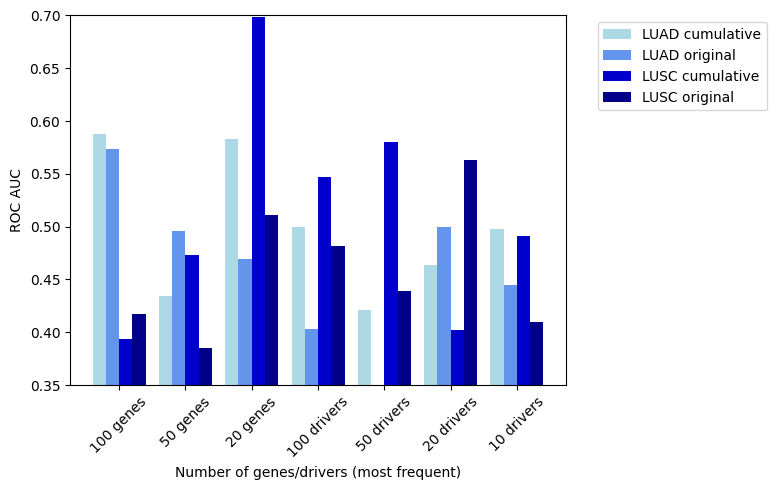

In [25]:
LUAD_ROC_AUC = [0.573083779,0.495543672,0.46969697,0.40285205,0.330659537,0.5,0.4442959]
LUSC_ROC_AUC = [0.417283951,0.385185185,0.511111111,0.481481481,0.439506173,0.562962963,0.409876543]
LUAD_cumulative_ROC_AUC = [0.587450593,0.434288538,0.583003953,0.5,0.421442688,0.463438735,0.497529644]
LUSC_cumulative_ROC_AUC = [0.393491124,0.473372781,0.698224852,0.547337278,0.579881657,0.402366864,0.49112426]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - barWidth*1.5, LUAD_cumulative_ROC_AUC, color='lightblue', width=barWidth, label='LUAD cumulative')
plt.bar(x_pos - barWidth*0.5, LUAD_ROC_AUC, color='cornflowerblue', width=barWidth, label='LUAD original')
plt.bar(x_pos + barWidth*0.5, LUSC_cumulative_ROC_AUC, color='mediumblue', width=barWidth, label='LUSC cumulative')
plt.bar(x_pos + barWidth*1.5, LUSC_ROC_AUC, color='darkblue', width=barWidth, label='LUSC original')



# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.35, 0.7)
# plt.title('ROC AUC for different number of genes/drivers in separate LUAD and LUSC cohorts with and without timing and ploidy features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

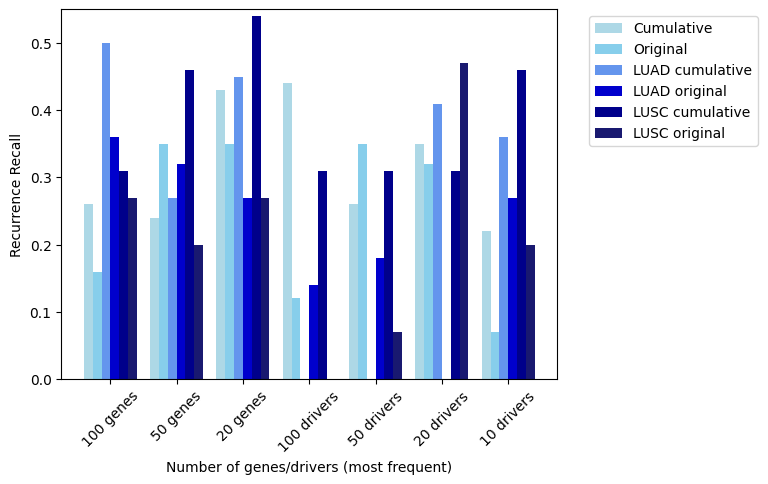

In [26]:
cumulative_recurrence_recall = [0.26,0.24,0.43,0.44,0.26,0.35,0.22]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]
cumulative_LUAD_recurrence_recall = [0.5,0.27,0.45,0,0,0.41,0.36]
cumulative_LUSC_recurrence_recall = [0.31,0.46,0.54,0.31,0.31,0.31,0.46]
LUAD_recurrence_recall = [0.36,0.32,0.27,0.14,0.18,0,0.27]
LUSC_recurrence_recall = [0.27,0.2,0.27,0,0.07,0.47,0.2]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x) * 1.5, step=1.5)

# Set the width for each bar
barWidth = 0.2

# Create the bars
plt.bar(x_pos - barWidth*2.5, cumulative_recurrence_recall, color='lightblue', width=barWidth, label='Cumulative')
plt.bar(x_pos - barWidth*1.5, neural_100_10_recurrence_recall, color='skyblue', width=barWidth, label='Original')
plt.bar(x_pos - barWidth*0.5, cumulative_LUAD_recurrence_recall, color='cornflowerblue', width=barWidth, label='LUAD cumulative')
plt.bar(x_pos + barWidth*0.5, LUAD_recurrence_recall, color='mediumblue', width=barWidth, label='LUAD original')
plt.bar(x_pos + barWidth*1.5, cumulative_LUSC_recurrence_recall, color='darkblue', width=barWidth, label='LUSC cumulative')
plt.bar(x_pos + barWidth*2.5, LUSC_recurrence_recall, color='midnightblue', width=barWidth, label='LUSC original')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence Recall')
plt.ylim(0, 0.55)
# plt.title('Recurrence recall for different number of genes/drivers in separate LUAD and LUSC cohorts with and without timing and ploidy features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

In [36]:
majorCPN_recurrence_recall = [0.39,0.54,0.25,0.23,0.47,0.32,0.16]
minorCPN_recurrence_recall = [0.18,0.16,0.16,0.28,0.16,0.25,0.14]
both_recurrence_recall = [0.14,0.32,0.35,0.37,0.28,0.33,0.12]
mutCPN_recurrence_recall = [0.25,0.26,0.11,0.28,0.28,0.33,0.26]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]

print(sum(majorCPN_recurrence_recall)/sum(neural_100_10_recurrence_recall)-1)
print(sum(minorCPN_recurrence_recall)/sum(neural_100_10_recurrence_recall)-1)
print(sum(both_recurrence_recall)/sum(neural_100_10_recurrence_recall)-1)
print(sum(mutCPN_recurrence_recall)/sum(neural_100_10_recurrence_recall)-1)
print(sum(neural_100_10_recurrence_recall)/sum(neural_100_10_recurrence_recall)-1)

0.37209302325581395
-0.2267441860465117
0.11046511627906974
0.029069767441860517
0.0


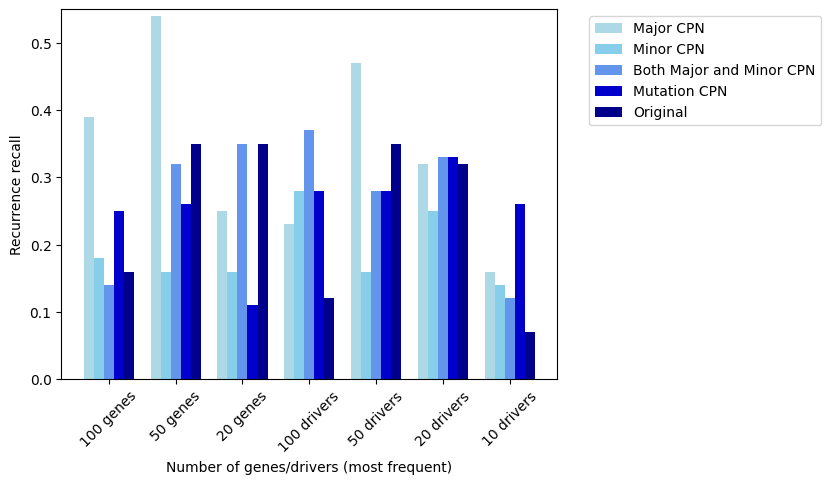

In [27]:
majorCPN_recurrence_recall = [0.39,0.54,0.25,0.23,0.47,0.32,0.16]
minorCPN_recurrence_recall = [0.18,0.16,0.16,0.28,0.16,0.25,0.14]
both_recurrence_recall = [0.14,0.32,0.35,0.37,0.28,0.33,0.12]
mutCPN_recurrence_recall = [0.25,0.26,0.11,0.28,0.28,0.33,0.26]
neural_100_10_recurrence_recall = [0.16,0.35,0.35,0.12,0.35,0.32,0.07]
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.15

# Create the bars

plt.bar(x_pos - barWidth*2, majorCPN_recurrence_recall, color='lightblue', width=barWidth, label='Major CPN')
plt.bar(x_pos - barWidth, minorCPN_recurrence_recall, color='skyblue', width=barWidth, label='Minor CPN')
plt.bar(x_pos, both_recurrence_recall, color='cornflowerblue', width=barWidth, label='Both Major and Minor CPN')
plt.bar(x_pos + barWidth, mutCPN_recurrence_recall, color='mediumblue', width=barWidth, label='Mutation CPN')
plt.bar(x_pos + barWidth*2, neural_100_10_recurrence_recall, color='darkblue', width=barWidth, label='Original')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.55)
# plt.title('Recurrence recall for different number of genes/drivers with various copy number features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

In [39]:
print(sum(majorCPN_balanced_accuracy)/sum(neural_100_10_balanced_accuracy)-1)
print(sum(minorCPN_balanced_accuracy)/sum(neural_100_10_balanced_accuracy)-1)
print(sum(both_balanced_accuracy)/sum(neural_100_10_balanced_accuracy)-1)
print(sum(mutCPN_balanced_accuracy)/sum(neural_100_10_balanced_accuracy)-1)
print(sum(neural_100_10_balanced_accuracy)/sum(neural_100_10_balanced_accuracy)-1)

-0.010532200141242232
-0.020639535375312268
-0.011963327630499565
-0.028175313183529394
0.0


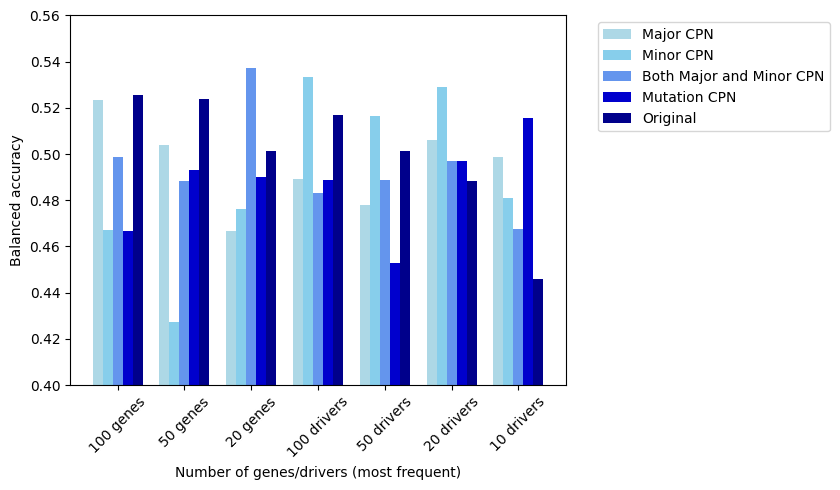

In [28]:
majorCPN_balanced_accuracy = [0.523339599,0.504072682,0.466557018,0.489035088,0.477913534,0.506109023,0.498590226]
minorCPN_balanced_accuracy = [0.467183584,0.427161654,0.476268797,0.53320802,0.516447368,0.529057018,0.480889724]
both_balanced_accuracy = [0.498746867,0.48825188,0.537045739,0.483317669,0.488565163,0.49702381,0.467653509]
mutCPN_balanced_accuracy = [0.466557018,0.49318609,0.490131579,0.488565163,0.452850877,0.49702381,0.515507519]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.15

# Create the bars

plt.bar(x_pos - barWidth*2, majorCPN_balanced_accuracy, color='lightblue', width=barWidth, label='Major CPN')
plt.bar(x_pos - barWidth, minorCPN_balanced_accuracy, color='skyblue', width=barWidth, label='Minor CPN')
plt.bar(x_pos, both_balanced_accuracy, color='cornflowerblue', width=barWidth, label='Both Major and Minor CPN')
plt.bar(x_pos + barWidth, mutCPN_balanced_accuracy, color='mediumblue', width=barWidth, label='Mutation CPN')
plt.bar(x_pos + barWidth*2, neural_100_10_balanced_accuracy, color='darkblue', width=barWidth, label='Original')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.56)
# plt.title('Balanced accuracy for different number of genes/drivers with various copy number features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

In [41]:
print(sum(majorCPN_ROC_AUC)/sum(neural_100_10_ROC_AUC)-1)
print(sum(minorCPN_ROC_AUC)/sum(neural_100_10_ROC_AUC)-1)
print(sum(both_ROC_AUC)/sum(neural_100_10_ROC_AUC)-1)
print(sum(mutCPN_ROC_AUC)/sum(neural_100_10_ROC_AUC)-1)
print(sum(neural_100_10_ROC_AUC)/sum(neural_100_10_ROC_AUC)-1)

0.030126825860500306
-0.03394991061103669
-0.015773087436034117
-0.003204981375016902
0.0


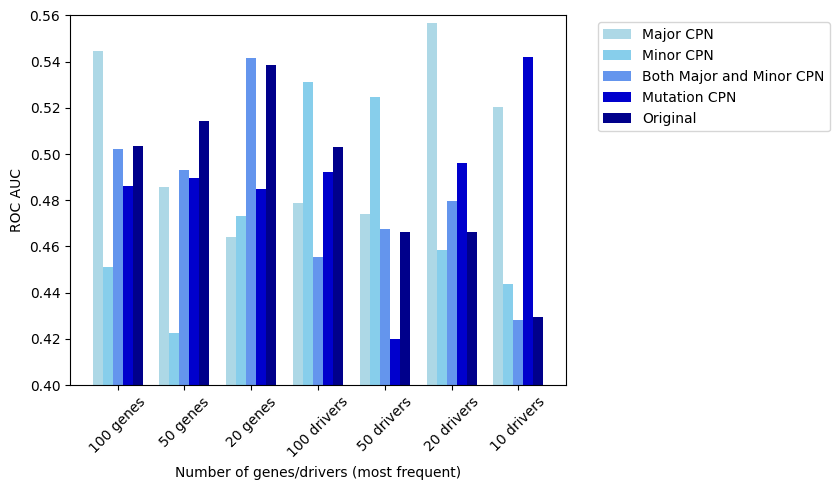

In [29]:
majorCPN_ROC_AUC = [0.544799499,0.485588972,0.464129073,0.478618421,0.473997494,0.556782581,0.520363409]
minorCPN_ROC_AUC = [0.450971178,0.422462406,0.473370927,0.531406642,0.524592732,0.458568296,0.443687343]
both_ROC_AUC = [0.502349624,0.492951128,0.541510025,0.455357143,0.467418546,0.479636591,0.428023183]
mutCPN_ROC_AUC = [0.485980576,0.489505013,0.484727444,0.492089599,0.419799499,0.495927318,0.542214912]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.15

# Create the bars

plt.bar(x_pos - barWidth*2, majorCPN_ROC_AUC, color='lightblue', width=barWidth, label='Major CPN')
plt.bar(x_pos - barWidth, minorCPN_ROC_AUC, color='skyblue', width=barWidth, label='Minor CPN')
plt.bar(x_pos, both_ROC_AUC, color='cornflowerblue', width=barWidth, label='Both Major and Minor CPN')
plt.bar(x_pos + barWidth, mutCPN_ROC_AUC, color='mediumblue', width=barWidth, label='Mutation CPN')
plt.bar(x_pos + barWidth*2, neural_100_10_ROC_AUC, color='darkblue', width=barWidth, label='Original')


# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of genes/drivers (most frequent)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.56)
# plt.title('ROC AUC for different number of genes/drivers with various copy number features')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

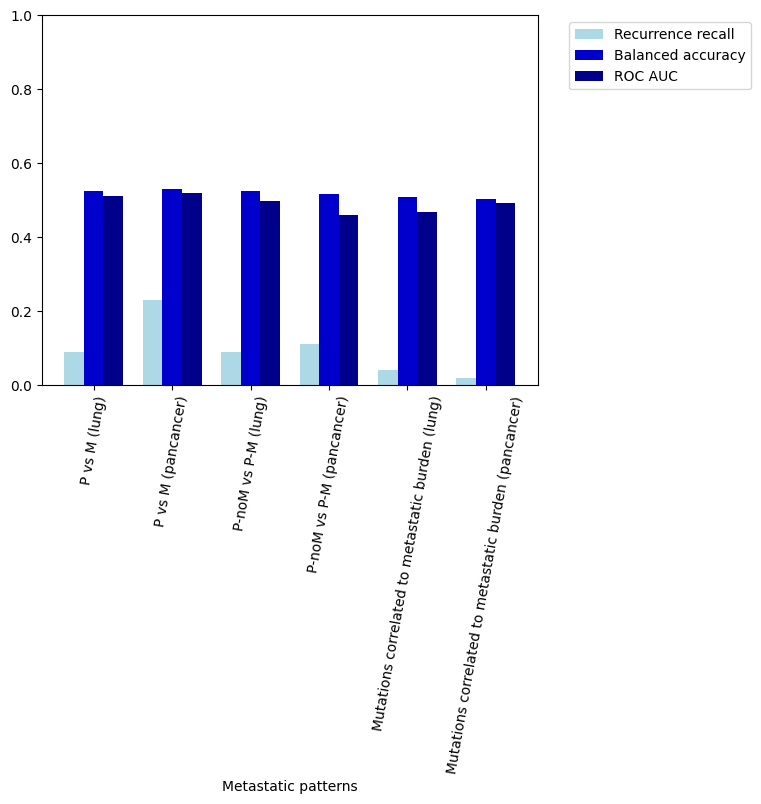

In [2]:
metastatic_patterns_recurrence_recall = [0.09,0.23,0.09,0.11,0.04,0.02]
metastatic_patterns_balanced_accuracy = [0.526002506,0.529213659,0.526002506,0.516917293,0.508615288,0.504307644]
metastatic_patterns_ROC_AUC = [0.510573308,0.520598371,0.497415414,0.4589599,0.468123434,0.492872807]

x= ['P vs M (lung)','P vs M (pancancer)','P-noM vs P-M (lung)','P-noM vs P-M (pancancer)','Mutations correlated to metastatic burden (lung)','Mutations correlated to metastatic burden (pancancer)']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.25

# Create the bars

plt.bar(x_pos - barWidth, metastatic_patterns_recurrence_recall, color='lightblue', width=barWidth, label='Recurrence recall')
plt.bar(x_pos, metastatic_patterns_balanced_accuracy, color='mediumblue', width=barWidth, label='Balanced accuracy')
plt.bar(x_pos + barWidth, metastatic_patterns_ROC_AUC, color='darkblue', width=barWidth, label='ROC AUC')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=80)

plt.xlabel('Metastatic patterns')
plt.ylim(0, 1)
# plt.title('Recurrence recall, balanced accuracy and ROC AUC for driver mutations identified as metastatic patterns')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

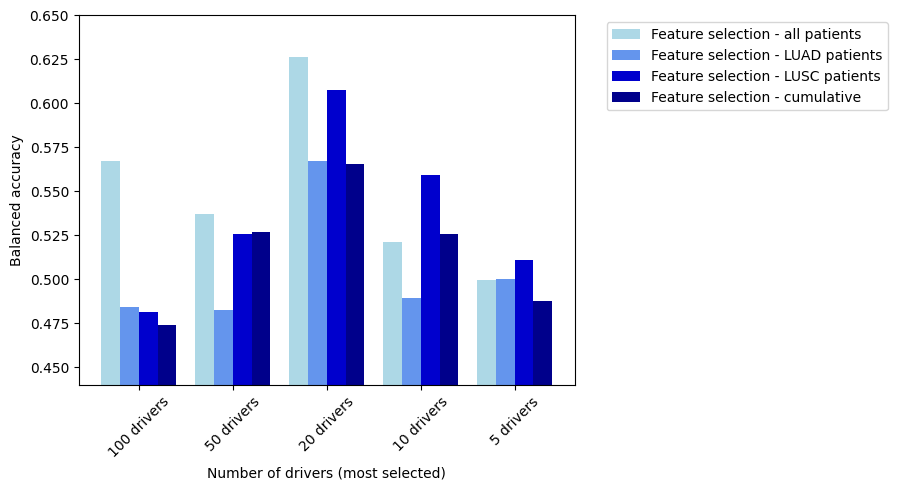

In [3]:
feature_selection_balanced_accuracy = [0.567512531,0.537202381,0.626488095,0.521381579,0.499686717]
feature_selection_ROC_AUC = [0.484179198,0.451597744,0.591635338,0.562969925,0.484492481]
feature_selection_recurrence_recall = [0.44,0.33,0.33,0.11,0.04]
feature_LUAD_balanced_accuracy = [0.484492481,0.482620321,0.567290553,0.489304813,0.5]
feature_LUAD_ROC_AUC = [0.325311943,0.359625668,0.494652406,0.494652406,0.5]
feature_LUAD_recurrence_recall = [0.18,0.32,0.41,0.27,0]
feature_LUSC_balanced_accuracy = [0.481481481,0.525925926,0.607407407,0.559259259,0.511111111]
feature_LUSC_ROC_AUC = [0.459259259,0.550617284,0.545679012,0.539506173,0.545679012]
feature_LUSC_recurrence_recall = [0.33,0.2,0.4,0.27,0.13]
feature_cumulative_balanced_accuracy = [0.474002849,0.526887464,0.565705128,0.525641026,0.487891738]
feature_cumulative_ROC_AUC = [0.439280627,0.489405271,0.590990028,0.550035613,0.51130698]
feature_cumulative_recurrence_recall = [0.35,0.35,0.33,0.17,0.13]

x =['100 drivers','50 drivers','20 drivers','10 drivers','5 drivers']

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.3, feature_selection_balanced_accuracy, color='lightblue', width=barWidth, label='Feature selection - all patients')
plt.bar(x_pos - 0.1, feature_LUAD_balanced_accuracy, color='cornflowerblue', width=barWidth, label='Feature selection - LUAD patients')
plt.bar(x_pos + 0.1, feature_LUSC_balanced_accuracy, color='mediumblue', width=barWidth, label='Feature selection - LUSC patients')
plt.bar(x_pos + 0.3, feature_cumulative_balanced_accuracy, color='darkblue', width=barWidth, label='Feature selection - cumulative')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.44, 0.65)
# plt.title('Balanced accuracy for different number of drivers with the largest difference in frequency between recurrence and no recurrence')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

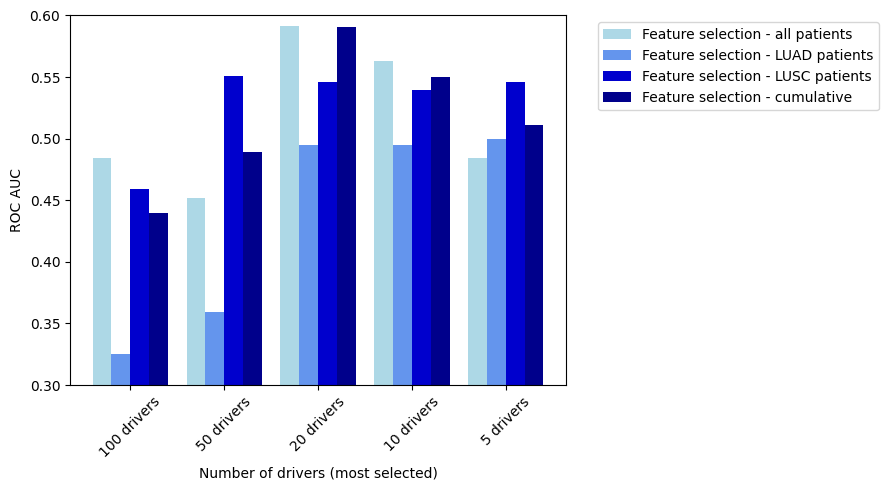

In [39]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.3, feature_selection_ROC_AUC, color='lightblue', width=barWidth, label='Feature selection - all patients')
plt.bar(x_pos - 0.1, feature_LUAD_ROC_AUC, color='cornflowerblue', width=barWidth, label='Feature selection - LUAD patients')
plt.bar(x_pos + 0.1, feature_LUSC_ROC_AUC, color='mediumblue', width=barWidth, label='Feature selection - LUSC patients')
plt.bar(x_pos + 0.3, feature_cumulative_ROC_AUC, color='darkblue', width=barWidth, label='Feature selection - cumulative')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('ROC AUC')
plt.ylim(0.3, 0.6)
# plt.title('ROC AUC for different number of drivers with the largest difference in frequency between recurrence and no recurrence')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

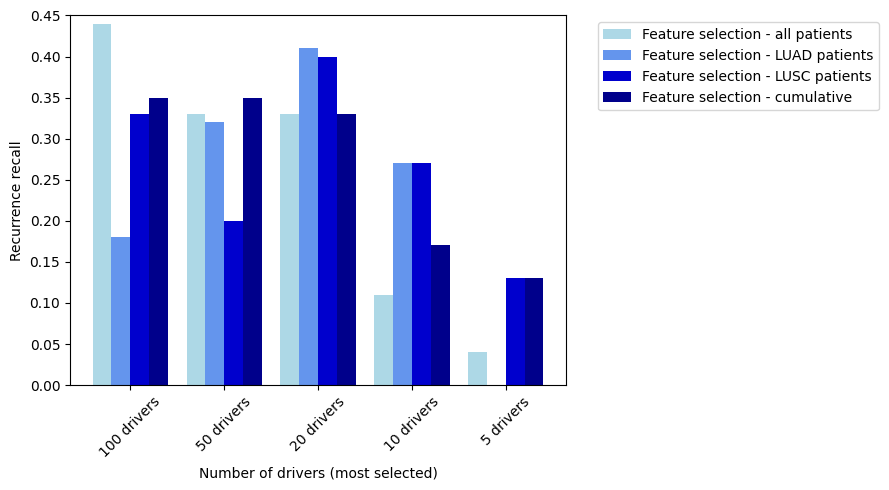

In [40]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.3, feature_selection_recurrence_recall, color='lightblue', width=barWidth, label='Feature selection - all patients')
plt.bar(x_pos - 0.1, feature_LUAD_recurrence_recall, color='cornflowerblue', width=barWidth, label='Feature selection - LUAD patients')
plt.bar(x_pos + 0.1, feature_LUSC_recurrence_recall, color='mediumblue', width=barWidth, label='Feature selection - LUSC patients')
plt.bar(x_pos + 0.3, feature_cumulative_recurrence_recall, color='darkblue', width=barWidth, label='Feature selection - cumulative')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.45)
# plt.title('Recurrence recall for different number of drivers with the largest difference in frequency between recurrence and no recurrence')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

In [35]:
feature_selection_balanced_accuracy = [0.567512531,0.537202381,0.626488095,0.521381579,0.499686717]
feature_selection_ROC_AUC = [0.484179198,0.451597744,0.591635338,0.562969925,0.484492481]
feature_selection_recurrence_recall = [0.44,0.33,0.33,0.11,0.04]
feature_LUAD_balanced_accuracy = [0.484492481,0.482620321,0.567290553,0.489304813,0.5]
feature_LUAD_ROC_AUC = [0.325311943,0.359625668,0.494652406,0.494652406,0.5]
feature_LUAD_recurrence_recall = [0.18,0.32,0.41,0.27,0]
feature_LUSC_balanced_accuracy = [0.481481481,0.525925926,0.607407407,0.559259259,0.511111111]
feature_LUSC_ROC_AUC = [0.459259259,0.550617284,0.545679012,0.539506173,0.545679012]
feature_LUSC_recurrence_recall = [0.33,0.2,0.4,0.27,0.13]
feature_cumulative_balanced_accuracy = [0.474002849,0.526887464,0.565705128,0.525641026,0.487891738]
feature_cumulative_ROC_AUC = [0.439280627,0.489405271,0.590990028,0.550035613,0.51130698]
feature_cumulative_recurrence_recall = [0.35,0.35,0.33,0.17,0.13]

print(sum(feature_selection_balanced_accuracy)/sum(feature_selection_balanced_accuracy)-1)
print(sum(feature_LUAD_balanced_accuracy)/sum(feature_selection_balanced_accuracy)-1)
print(sum(feature_LUSC_balanced_accuracy)/sum(feature_selection_balanced_accuracy)-1)
print(sum(feature_cumulative_balanced_accuracy)/sum(feature_selection_balanced_accuracy)-1)

print(sum(feature_selection_ROC_AUC)/sum(feature_selection_ROC_AUC)-1)
print(sum(feature_LUAD_ROC_AUC)/sum(feature_selection_ROC_AUC)-1)
print(sum(feature_LUSC_ROC_AUC)/sum(feature_selection_ROC_AUC)-1)
print(sum(feature_cumulative_ROC_AUC)/sum(feature_selection_ROC_AUC)-1)

print(sum(feature_selection_recurrence_recall)/sum(feature_selection_recurrence_recall)-1)
print(sum(feature_LUAD_recurrence_recall)/sum(feature_selection_recurrence_recall)-1)
print(sum(feature_LUSC_recurrence_recall)/sum(feature_selection_recurrence_recall)-1)
print(sum(feature_cumulative_recurrence_recall)/sum(feature_selection_recurrence_recall)-1)


0.0
-0.08304527782230786
-0.024374820508020312
-0.06254583180530293
0.0
-0.15559291688185883
0.025580294978285067
0.002386070682742325
0.0
-0.05600000000000027
0.06399999999999983
0.06399999999999983


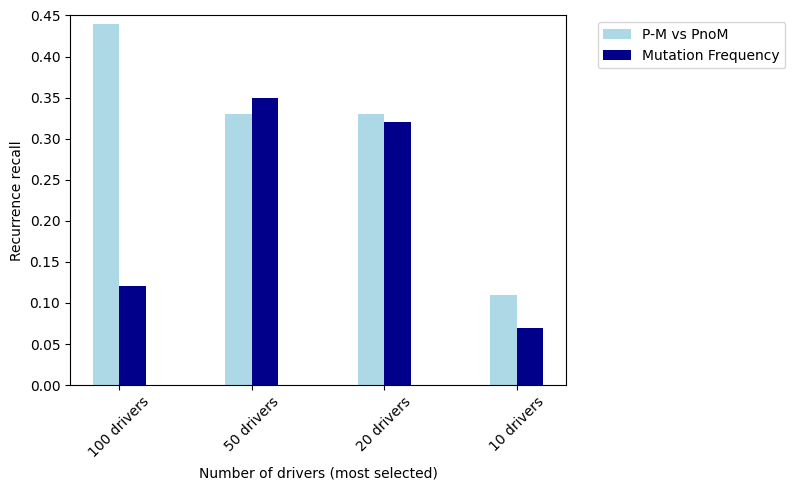

In [8]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_selection_recurrence_recall[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, neural_100_10_recurrence_recall[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.45)
# plt.title('Recurrence recall for different methods of feature selection')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

In [11]:
neural_100_10_balanced_accuracy

[0.52537594,
 0.523652882,
 0.501331454,
 0.516760652,
 0.501331454,
 0.48825188,
 0.445802005]

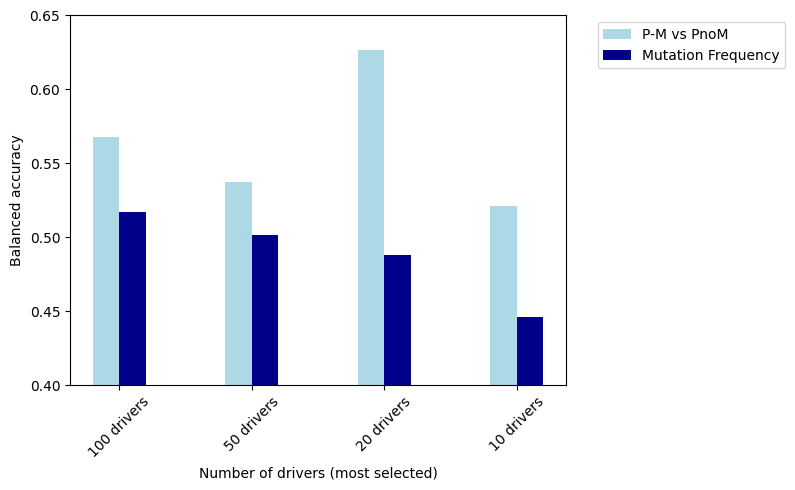

In [14]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_selection_balanced_accuracy[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, neural_100_10_balanced_accuracy[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.40, 0.65)
# plt.title('Balanced accuracy for different methods of feature selection')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

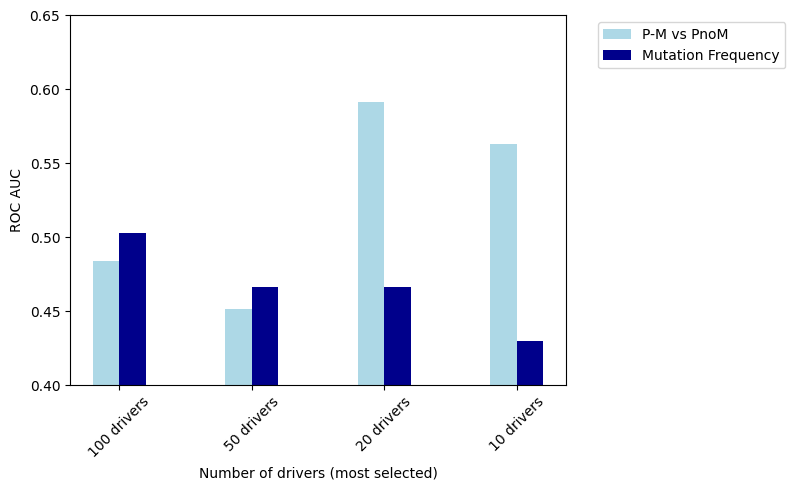

In [15]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_selection_ROC_AUC[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, neural_100_10_ROC_AUC[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.65)
# plt.title('ROC AUC for different methods of feature selection')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

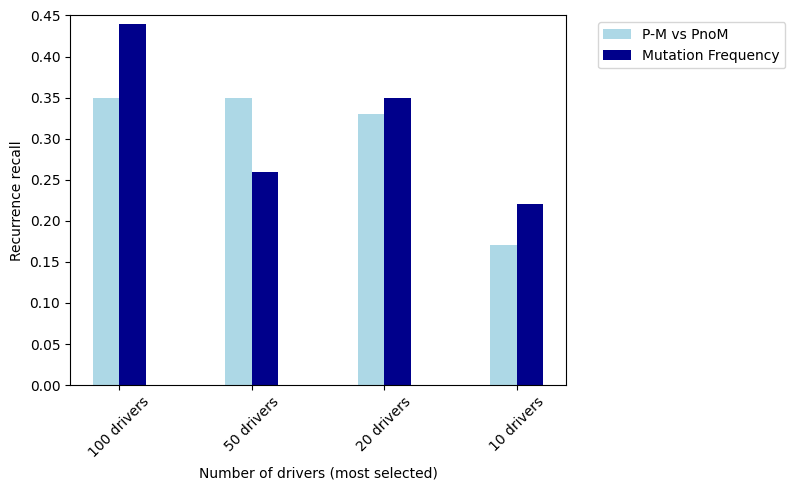

In [33]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_cumulative_recurrence_recall[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, cumulative_recurrence_recall[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.45)
# plt.title('Recurrence recall for different methods of feature selection with cumulative analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

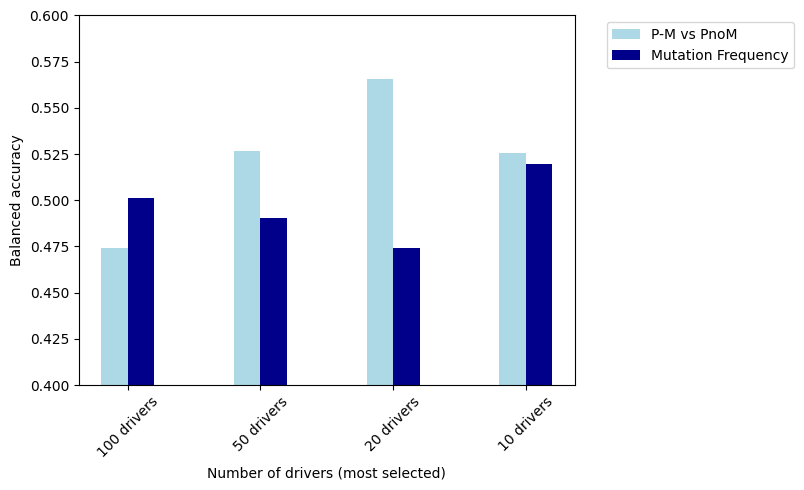

In [47]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_cumulative_balanced_accuracy[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, cumulative_balanced_accuracy[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.4, 0.6)
# plt.title('Balanced accuracy for different methods of feature selection with cumulative analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

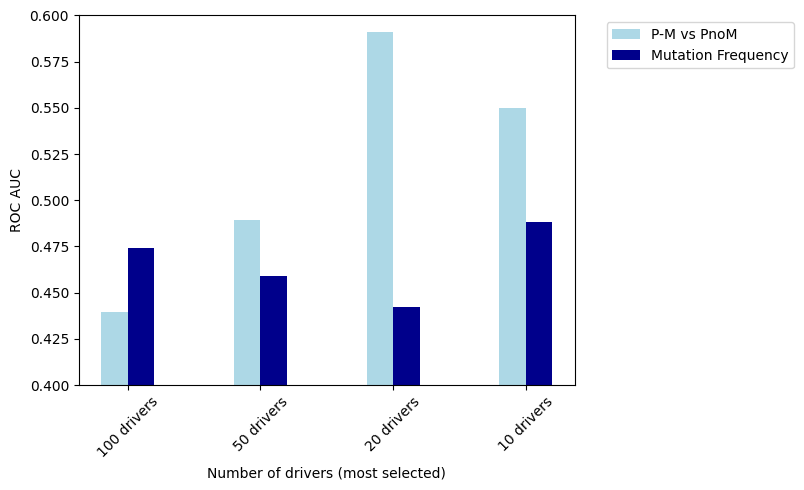

In [46]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars

plt.bar(x_pos - 0.1, feature_cumulative_ROC_AUC[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM')
plt.bar(x_pos + 0.1, cumulative_ROC_AUC[3:], color='darkblue', width=barWidth, label='Mutation Frequency')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('ROC AUC')
plt.ylim(0.4, 0.6)
# plt.title('ROC AUC for different methods of feature selection with cumulative analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

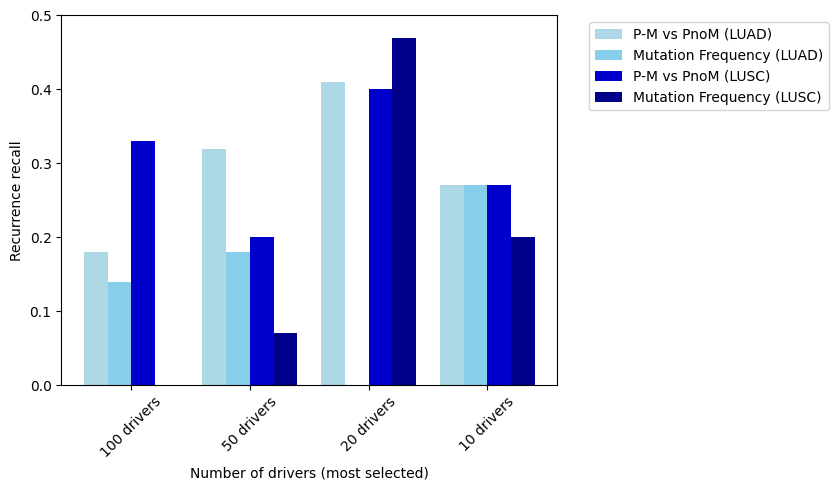

In [40]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars
plt.bar(x_pos - 0.3, feature_LUAD_recurrence_recall[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM (LUAD)')
plt.bar(x_pos - 0.1, LUAD_recurrence_recall[3:], color='skyblue', width=barWidth, label='Mutation Frequency (LUAD)')
plt.bar(x_pos + 0.1, feature_LUSC_recurrence_recall[0:4], color='mediumblue', width=barWidth, label='P-M vs PnoM (LUSC)')
plt.bar(x_pos + 0.3, LUSC_recurrence_recall[3:], color='darkblue', width=barWidth, label='Mutation Frequency (LUSC)')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Recurrence recall')
plt.ylim(0, 0.5)
# plt.title('Recurrence recall for different methods of feature selection with split cohort analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

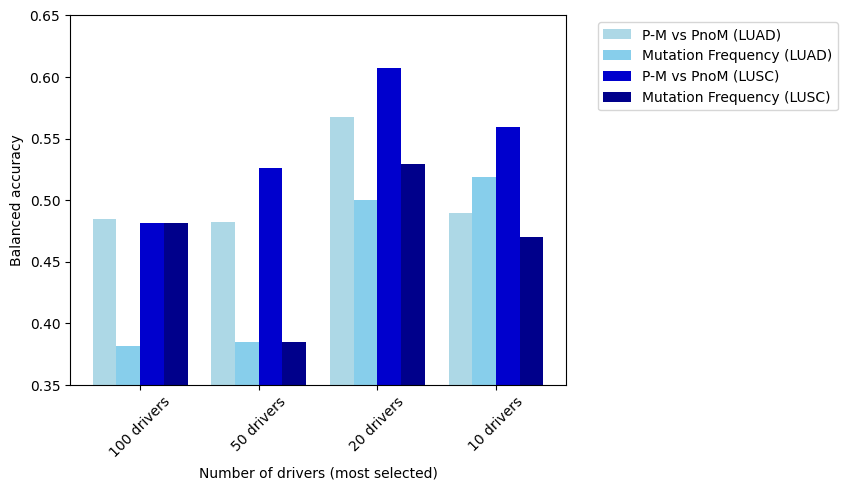

In [42]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars
plt.bar(x_pos - 0.3, feature_LUAD_balanced_accuracy[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM (LUAD)')
plt.bar(x_pos - 0.1, LUAD_balanced_accuracy[3:], color='skyblue', width=barWidth, label='Mutation Frequency (LUAD)')
plt.bar(x_pos + 0.1, feature_LUSC_balanced_accuracy[0:4], color='mediumblue', width=barWidth, label='P-M vs PnoM (LUSC)')
plt.bar(x_pos + 0.3, LUSC_balanced_accuracy[3:], color='darkblue', width=barWidth, label='Mutation Frequency (LUSC)')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('Balanced accuracy')
plt.ylim(0.35, 0.65)
# plt.title('Balanced accuracy for different methods of feature selection with split cohort analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

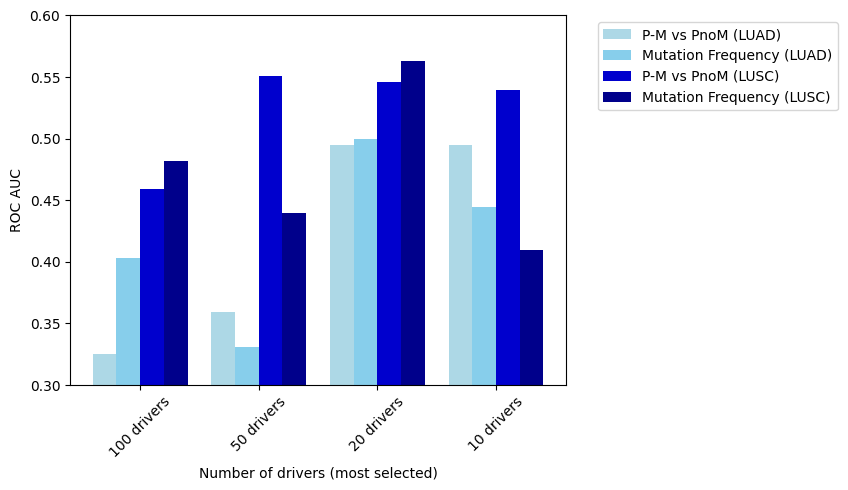

In [44]:
# Create an array with the position of each bar along the x-axis
x= ['100 drivers','50 drivers','20 drivers','10 drivers']
x_pos = np.arange(len(x))

# Set the width for each bar
barWidth = 0.2

# Create the bars
plt.bar(x_pos - 0.3, feature_LUAD_ROC_AUC[0:4], color='lightblue', width=barWidth, label='P-M vs PnoM (LUAD)')
plt.bar(x_pos - 0.1, LUAD_ROC_AUC[3:], color='skyblue', width=barWidth, label='Mutation Frequency (LUAD)')
plt.bar(x_pos + 0.1, feature_LUSC_ROC_AUC[0:4], color='mediumblue', width=barWidth, label='P-M vs PnoM (LUSC)')
plt.bar(x_pos + 0.3, LUSC_ROC_AUC[3:], color='darkblue', width=barWidth, label='Mutation Frequency (LUSC)')

# Fix the x-axes.
plt.xticks(x_pos, x, rotation=45)

plt.xlabel('Number of drivers (most selected)')
plt.ylabel('ROC AUC')
plt.ylim(0.30, 0.60)
# plt.title('ROC AUC for different methods of feature selection with split cohort analysis')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left')

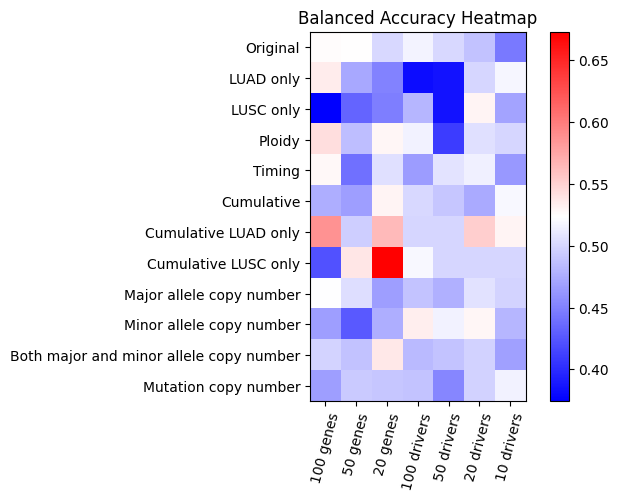

In [76]:
rows = ['Original', 'LUAD only', 'LUSC only', 'Ploidy', 'Timing', 'Cumulative', 'Cumulative LUAD only', 'Cumulative LUSC only', 'Major allele copy number', 'Minor allele copy number',
        'Both major and minor allele copy number', 'Mutation copy number']
columns = ['100 genes', '50 genes', '20 genes', '100 drivers', '50 drivers', '20 drivers', '10 drivers']


all_100_10_balanced_accuracy = [[0.52537594,0.523652882,0.501331454,0.516760652,0.501331454,0.48825188,0.445802005],
                         [0.534759358,0.472816399,0.450089127,0.381907308,0.385026738,0.5,0.518716578],
                         [0.374074074,0.433333333,0.448148148,0.481481481,0.385185185,0.52962963,0.47037037],
                         [0.543269231,0.486111111,0.528668091,0.515669516,0.410078348,0.50534188,0.5],
                         [0.528117168,0.439614662,0.505639098,0.465617168,0.50783208,0.514880952,0.463189223],
                         [0.475783476,0.466524217,0.530270655,0.501068376,0.490206553,0.474002849,0.519764957],
                         [0.586956522,0.495059289,0.564229249,0.5,0.5,0.552371542,0.529644269],
                         [0.423076923,0.538461538,0.673076923,0.519230769,0.5,0.5,0.5],
                         [0.523339599,0.504072682,0.466557018,0.489035088,0.477913534,0.506109023,0.498590226],
                         [0.467183584,0.427161654,0.476268797,0.53320802,0.516447368,0.529057018,0.480889724],
                         [0.498746867,0.48825188,0.537045739,0.483317669,0.488565163,0.49702381,0.467653509],
                         [0.466557018,0.49318609,0.490131579,0.488565163,0.452850877,0.49702381,0.515507519]]

all_100_10_ROC_AUC = [[0.503446115,0.514411028,0.538455514,0.50297619,0.466243734,0.466087093,0.429589599],
               [0.573083779,0.495543672,0.46969697,0.40285205,0.330659537,0.5,0.4442959],
               [0.417283951,0.385185185,0.511111111,0.481481481,0.439506173,0.562962963,0.409876543],
               [0.568108974,0.480413105,0.499465812,0.50133547,0.412393162,0.483707265,0.431000712],
               [0.501253133,0.423167293,0.515350877,0.430607769,0.502662907,0.537593985,0.443687343],
               [0.538283476,0.532229345,0.502314815,0.474358974,0.458956553,0.442396724,0.488069801],
               [0.587450593,0.434288538,0.583003953,0.5,0.421442688,0.463438735,0.497529644],
               [0.393491124,0.473372781,0.698224852,0.547337278,0.579881657,0.402366864,0.49112426],
               [0.544799499,0.485588972,0.464129073,0.478618421,0.473997494,0.556782581,0.520363409],
               [0.450971178,0.422462406,0.473370927,0.531406642,0.524592732,0.458568296,0.443687343],
               [0.502349624,0.492951128,0.541510025,0.455357143,0.467418546,0.479636591,0.428023183],
               [0.485980576,0.489505013,0.484727444,0.492089599,0.419799499,0.495927318,0.542214912]]

all_100_10_recurrence_recall = [[0.16,0.35,0.35,0.12,0.35,0.32,0.07],
                         [0.36,0.32,0.27,0.14,0.18,0,0.27],
                         [0.27,0.2,0.27,0,0.07,0.47,0.2],
                         [0.5,0.22,0.26,0.19,0.43,0.22,0],
                         [0.35,0.26,0.37,0.35,0.12,0.33,0.12],
                         [0.26,0.24,0.43,0.44,0.26,0.35,0.22],
                         [0.5,0.27,0.45,0,0,0.41,0.36],
                         [0.31,0.46,0.54,0.31,0.31,0.31,0.46],
                         [0.39,0.54,0.25,0.23,0.47,0.32,0.16],
                         [0.18,0.16,0.16,0.28,0.16,0.25,0.14],
                         [0.14,0.32,0.35,0.37,0.28,0.33,0.12],
                         [0.25,0.26,0.11,0.28,0.28,0.33,0.26]]


plt.imshow(all_100_10_balanced_accuracy, cmap='bwr')
plt.colorbar()  # Add a colorbar to show the scale

plt.xticks(np.arange(7),columns,rotation=75)
plt.yticks(np.arange(12),rows)

# Set title
plt.title('Balanced Accuracy Heatmap')

plt.show()

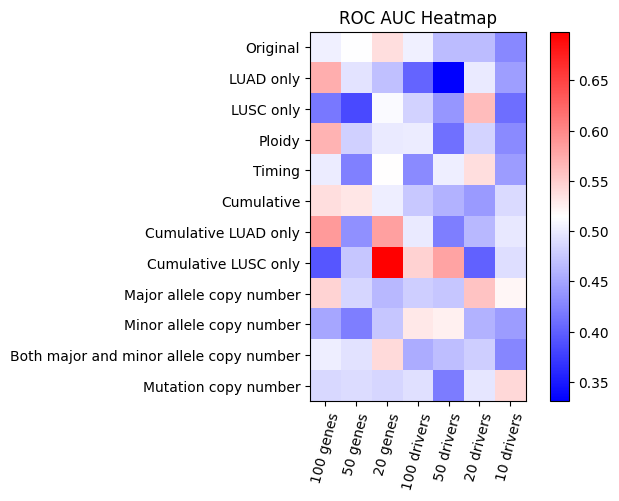

In [86]:
plt.imshow(all_100_10_ROC_AUC, cmap='bwr')
plt.colorbar()  # Add a colorbar to show the scale

plt.xticks(np.arange(7),columns,rotation=75)
plt.yticks(np.arange(12),rows)

# Set title
plt.title('ROC AUC Heatmap')

plt.show()

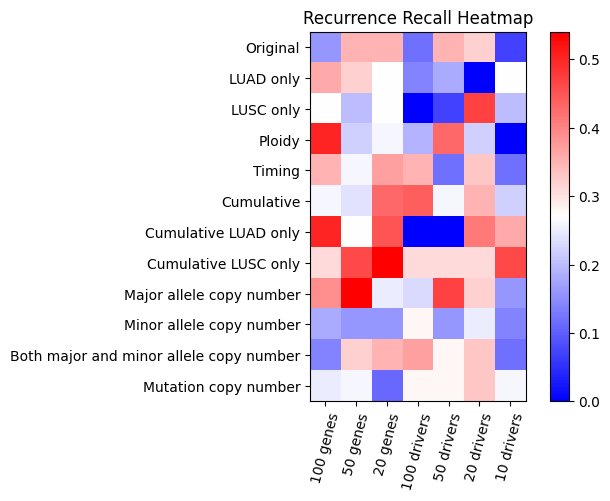

In [87]:
plt.imshow(all_100_10_recurrence_recall, cmap='bwr')
plt.colorbar()  # Add a colorbar to show the scale

plt.xticks(np.arange(7),columns,rotation=75)
plt.yticks(np.arange(12),rows)

# Set title
plt.title('Recurrence Recall Heatmap')

plt.show()